# **Financial Health Score Prediction using MLR**

By: Pragya Gupta

Course: PGDM – RBA 24-26

Specialization: Finance

Roll no.: 55


# **Exploratory Data Analysis Steps:**

# 1. **Loading necessary libraries & dataset**

•	Import essential libraries

•	Load the dataset into a data frame


In [1]:
import pandas as pd

In [2]:
Financial_health_data = pd.read_excel("/content/FDRA data.xlsx")

# **2. Understanding the data**

•	Understand what is being conveyed

•	Understand the shape of the data frame & data types of each variable

•	Create a descriptive statistical summary of each numerical column

•	Identify unique values in categorical columns

In [3]:
Financial_health_data.head()

Company_ID      Company_Name       Industry  Year  Total_Revenue_USD  \
0     C00001   Norris and Sons        Finance  2015       1.027334e+09   
1     C00002  Garrison-Schmidt        Finance  2016       9.054109e+08   
2     C00003    Collins-Horton  Manufacturing  2017       4.702907e+09   
3     C00004   Johnson-Sanders  Manufacturing  2018       1.307339e+09   
4     C00005    Smith-Franklin     Healthcare  2019       1.874920e+09   

   Gross_Profit_USD  Operating_Expenses_USD  Net_Income_USD    EBITDA_USD  \
0      1.179003e+09            3.049560e+08    7.468690e+08  1.264810e+09   
1      1.339129e+09            4.871704e+08    8.189346e+08  1.178403e+09   
2      9.444073e+08            1.190481e+08    4.433828e+08  9.167690e+08   
3      4.877999e+08            9.940402e+08    3.346814e+08  7.426552e+08   
4      1.798042e+09            3.430495e+08    6.454143e+08  1.458184e+08   

   Debt_to_Equity_Ratio  Current_Ratio  Quick_Ratio  Return_on_Assets_%  \
0                  2.25           4.72         4.00               13.36   
1                  1.74           4.03         1.42                3.24   
2                  2.33           2.99         1.33                8.57   
3                  0.59           2.18         3.15               11.46   
4                  0.17           2.05         2.58               12.45   

   Return_on_Equity_%  Cash_Flow_USD  Financial_Health_Score Credit_Rating  
0               11.14   8.774030e+08                      71             C  
1               31.60   7.480579e+08                      79           BBB  
2               25.71   3.967697e+08                      17           BBB  
3              -19.48   4.637669e+08                      73             C  
4               14.14   8.941684e+08                      78             C

In [4]:
Financial_health_data.tail()

Company_ID              Company_Name                Industry  Year  \
9995     C00996  Griffin, Berry and Silva                  Retail  2020   
9996     C00997               Wolf-Curtis              Healthcare  2021   
9997     C00998             Contreras Inc                 Finance  2022   
9998     C00999                 Perez PLC  Information Technology  2023   
9999     C01000             Clarke-Graves                  Energy  2024   

      Total_Revenue_USD  Gross_Profit_USD  Operating_Expenses_USD  \
9995       4.250388e+09      1.409481e+09            7.107639e+08   
9996       3.999297e+09      1.690308e+09            1.601995e+07   
9997       3.908384e+09      1.209838e+09            7.019297e+08   
9998       4.661478e+09      1.251007e+09            7.867733e+08   
9999       1.873369e+09      9.932118e+08            6.965629e+08   

      Net_Income_USD    EBITDA_USD  Debt_to_Equity_Ratio  Current_Ratio  \
9995    6.714215e+08  3.325362e+08                  1.13           2.33   
9996    3.498803e+08  5.573327e+07                  1.78           1.83   
9997    6.473550e+08  1.483233e+09                  0.49           1.43   
9998    3.972234e+08  9.774684e+06                  2.50           1.56   
9999   -1.886783e+07  9.265212e+08                  2.30           4.11   

      Quick_Ratio  Return_on_Assets_%  Return_on_Equity_%  Cash_Flow_USD  \
9995         3.08               -4.07               14.23   6.418490e+08   
9996         1.18                5.32               27.79   8.596194e+08   
9997         2.13               17.54               -7.77   7.841647e+08   
9998         0.67                9.43                2.43   2.441462e+08   
9999         2.29               10.06              -11.97   5.441210e+07   

      Financial_Health_Score Credit_Rating  
9995                      35             A  
9996                      71           CCC  
9997                      21             B  
9998                      78           BBB  
9999                      34           CCC

In [5]:
Financial_health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company_ID              10000 non-null  object 
 1   Company_Name            10000 non-null  object 
 2   Industry                10000 non-null  object 
 3   Year                    10000 non-null  int64  
 4   Total_Revenue_USD       10000 non-null  float64
 5   Gross_Profit_USD        10000 non-null  float64
 6   Operating_Expenses_USD  10000 non-null  float64
 7   Net_Income_USD          10000 non-null  float64
 8   EBITDA_USD              10000 non-null  float64
 9   Debt_to_Equity_Ratio    10000 non-null  float64
 10  Current_Ratio           10000 non-null  float64
 11  Quick_Ratio             10000 non-null  float64
 12  Return_on_Assets_%      10000 non-null  float64
 13  Return_on_Equity_%      10000 non-null  float64
 14  Cash_Flow_USD           10000 non-null 

In [6]:
Financial_health_data.nunique()

Company_ID                 1000
Company_Name                967
Industry                      7
Year                         10
Total_Revenue_USD         10000
Gross_Profit_USD          10000
Operating_Expenses_USD    10000
Net_Income_USD            10000
EBITDA_USD                10000
Debt_to_Equity_Ratio        291
Current_Ratio               451
Quick_Ratio                 371
Return_on_Assets_%         3303
Return_on_Equity_%         4870
Cash_Flow_USD             10000
Financial_Health_Score      101
Credit_Rating                10
dtype: int64

In [7]:
Financial_health_data.describe().T

count          mean           std          min  \
Year                    10000.0  2.019500e+03  2.872425e+00      2015.00   
Total_Revenue_USD       10000.0  2.478047e+09  1.442177e+09   1262214.38   
Gross_Profit_USD        10000.0  1.002849e+09  5.791751e+08    213776.72   
Operating_Expenses_USD  10000.0  5.051261e+08  2.887368e+08     86583.35   
Net_Income_USD          10000.0  4.799180e+08  3.022467e+08 -49983440.72   
EBITDA_USD              10000.0  7.513214e+08  4.339666e+08    109857.34   
Debt_to_Equity_Ratio    10000.0  1.552612e+00  8.328508e-01         0.10   
Current_Ratio           10000.0  2.754103e+00  1.296368e+00         0.50   
Quick_Ratio             10000.0  2.158754e+00  1.068381e+00         0.30   
Return_on_Assets_%      10000.0  7.397171e+00  1.014625e+01        -9.99   
Return_on_Equity_%      10000.0  9.829816e+00  1.738108e+01       -20.00   
Cash_Flow_USD           10000.0  4.551772e+08  3.183888e+08 -99961946.26   
Financial_Health_Score  10000.0  5.002080e+01  2.891088e+01         0.00   

                                 25%           50%           75%           max  
Year                    2.017000e+03  2.019500e+03  2.022000e+03  2.024000e+03  
Total_Revenue_USD       1.218996e+09  2.481370e+09  3.713956e+09  4.999607e+09  
Gross_Profit_USD        5.066687e+08  9.998616e+08  1.504186e+09  1.999548e+09  
Operating_Expenses_USD  2.535709e+08  5.077906e+08  7.569370e+08  9.999894e+08  
Net_Income_USD          2.170722e+08  4.819632e+08  7.397643e+08  9.998447e+08  
EBITDA_USD              3.767166e+08  7.479296e+08  1.128488e+09  1.499828e+09  
Debt_to_Equity_Ratio    8.400000e-01  1.560000e+00  2.260000e+00  3.000000e+00  
Current_Ratio           1.650000e+00  2.730000e+00  3.870000e+00  5.000000e+00  
Quick_Ratio             1.230000e+00  2.170000e+00  3.080000e+00  4.000000e+00  
Return_on_Assets_%     -1.602500e+00  7.470000e+00  1.622000e+01  2.500000e+01  
Return_on_Equity_%     -5.350000e+00  9.865000e+00  2.497500e+01  4.000000e+01  
Cash_Flow_USD           1.814316e+08  4.545447e+08  7.285413e+08  9.999772e+08  
Financial_Health_Score  2.500000e+01  5.000000e+01  7.500000e+01  1.000000e+02

**3. Data Cleaning:**

•	Identify the null and duplicate values, and handle them

•	Remove the insignificant columns (e.g., IDs)

In [8]:
Financial_health_data.isnull().sum()

Company_ID                0
Company_Name              0
Industry                  0
Year                      0
Total_Revenue_USD         0
Gross_Profit_USD          0
Operating_Expenses_USD    0
Net_Income_USD            0
EBITDA_USD                0
Debt_to_Equity_Ratio      0
Current_Ratio             0
Quick_Ratio               0
Return_on_Assets_%        0
Return_on_Equity_%        0
Cash_Flow_USD             0
Financial_Health_Score    0
Credit_Rating             0
dtype: int64

In [9]:
Financial_health_data.duplicated().sum()

np.int64(0)

In [10]:
# prompt: drop Company_ID column from the dataset

Financial_health_data.drop('Company_ID', axis=1, inplace=True)

In [11]:
Financial_health_data

Company_Name                Industry  Year  \
0              Norris and Sons                 Finance  2015   
1             Garrison-Schmidt                 Finance  2016   
2               Collins-Horton           Manufacturing  2017   
3              Johnson-Sanders           Manufacturing  2018   
4               Smith-Franklin              Healthcare  2019   
...                        ...                     ...   ...   
9995  Griffin, Berry and Silva                  Retail  2020   
9996               Wolf-Curtis              Healthcare  2021   
9997             Contreras Inc                 Finance  2022   
9998                 Perez PLC  Information Technology  2023   
9999             Clarke-Graves                  Energy  2024   

      Total_Revenue_USD  Gross_Profit_USD  Operating_Expenses_USD  \
0          1.027334e+09      1.179003e+09            3.049560e+08   
1          9.054109e+08      1.339129e+09            4.871704e+08   
2          4.702907e+09      9.444073e+08            1.190481e+08   
3          1.307339e+09      4.877999e+08            9.940402e+08   
4          1.874920e+09      1.798042e+09            3.430495e+08   
...                 ...               ...                     ...   
9995       4.250388e+09      1.409481e+09            7.107639e+08   
9996       3.999297e+09      1.690308e+09            1.601995e+07   
9997       3.908384e+09      1.209838e+09            7.019297e+08   
9998       4.661478e+09      1.251007e+09            7.867733e+08   
9999       1.873369e+09      9.932118e+08            6.965629e+08   

      Net_Income_USD    EBITDA_USD  Debt_to_Equity_Ratio  Current_Ratio  \
0       7.468690e+08  1.264810e+09                  2.25           4.72   
1       8.189346e+08  1.178403e+09                  1.74           4.03   
2       4.433828e+08  9.167690e+08                  2.33           2.99   
3       3.346814e+08  7.426552e+08                  0.59           2.18   
4       6.454143e+08  1.458184e+08                  0.17           2.05   
...              ...           ...                   ...            ...   
9995    6.714215e+08  3.325362e+08                  1.13           2.33   
9996    3.498803e+08  5.573327e+07                  1.78           1.83   
9997    6.473550e+08  1.483233e+09                  0.49           1.43   
9998    3.972234e+08  9.774684e+06                  2.50           1.56   
9999   -1.886783e+07  9.265212e+08                  2.30           4.11   

      Quick_Ratio  Return_on_Assets_%  Return_on_Equity_%  Cash_Flow_USD  \
0            4.00               13.36               11.14   8.774030e+08   
1            1.42                3.24               31.60   7.480579e+08   
2            1.33                8.57               25.71   3.967697e+08   
3            3.15               11.46              -19.48   4.637669e+08   
4            2.58               12.45               14.14   8.941684e+08   
...           ...                 ...                 ...            ...   
9995         3.08               -4.07               14.23   6.418490e+08   
9996         1.18                5.32               27.79   8.596194e+08   
9997         2.13               17.54               -7.77   7.841647e+08   
9998         0.67                9.43                2.43   2.441462e+08   
9999         2.29               10.06              -11.97   5.441210e+07   

      Financial_Health_Score Credit_Rating  
0                         71             C  
1                         79           BBB  
2                         17           BBB  
3                         73             C  
4                         78             C  
...                      ...           ...  
9995                      35             A  
9996                      71           CCC  
9997                      21             B  
9998                      78           BBB  
9999                      34           CCC  

[10000 rows x 16 columns]

# **4. Univariate Analysis**

•	Understand the distribution of data, skewness, and kurtosis

•	Identify outliers in continuous columns

•	Treat the identified outlier values as best suited


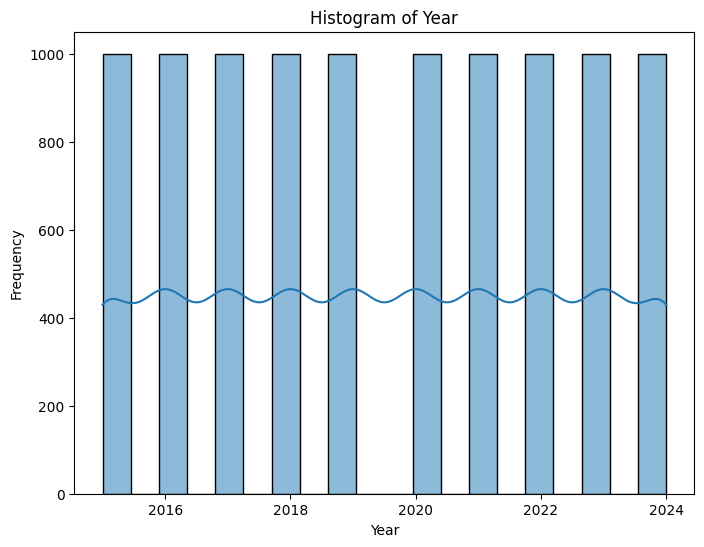

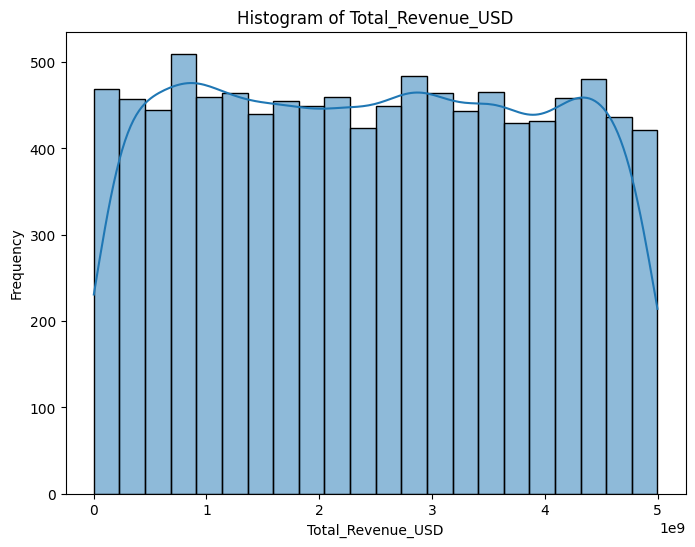

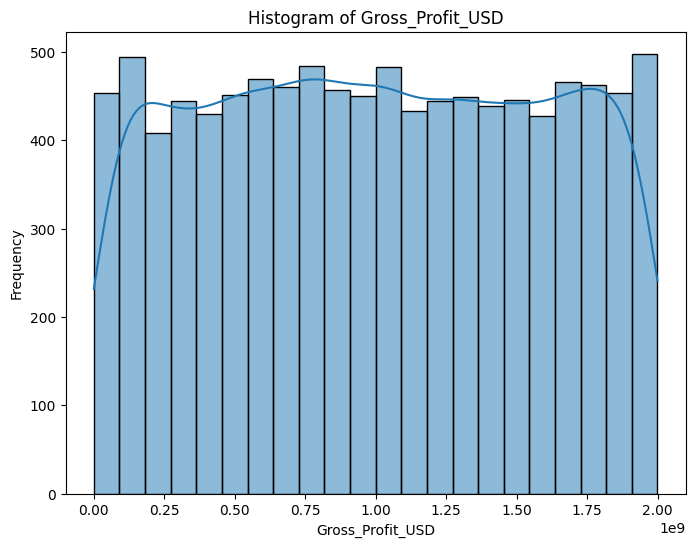

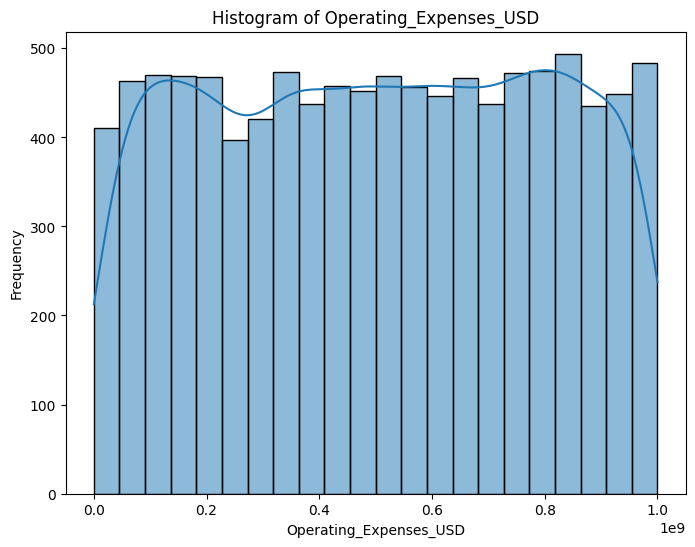

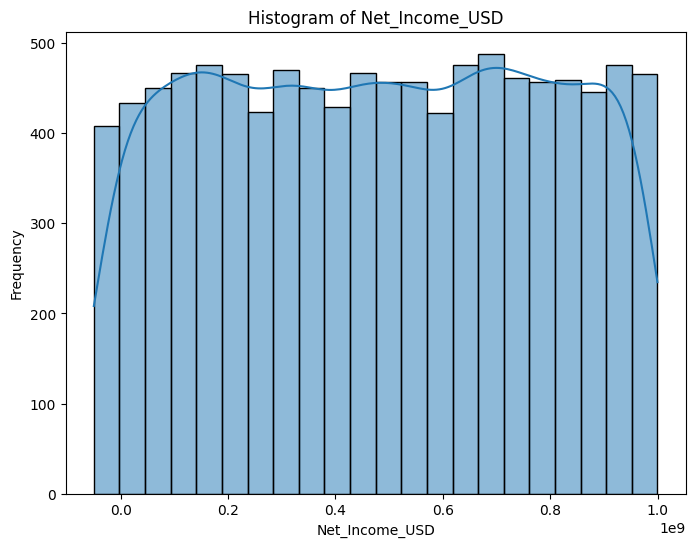

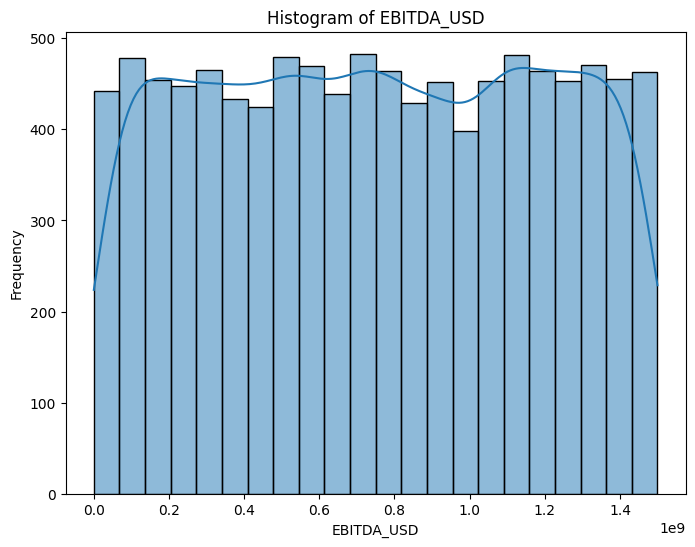

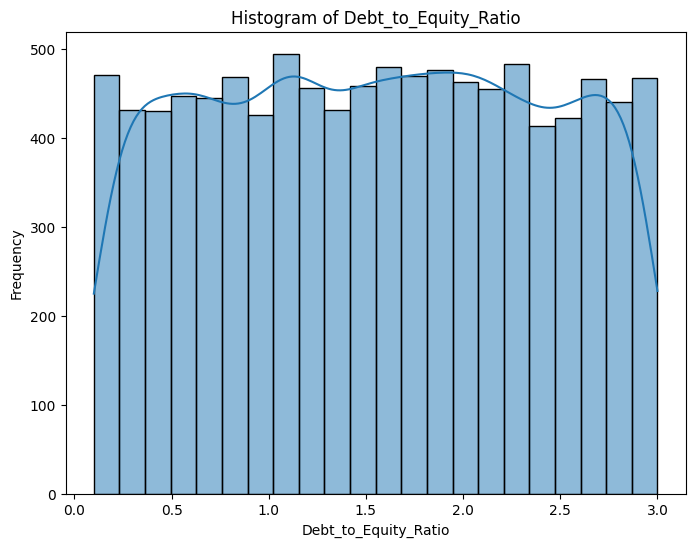

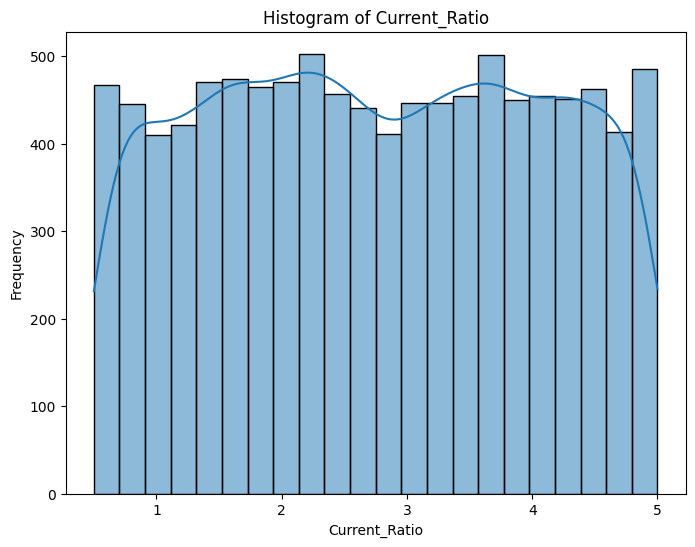

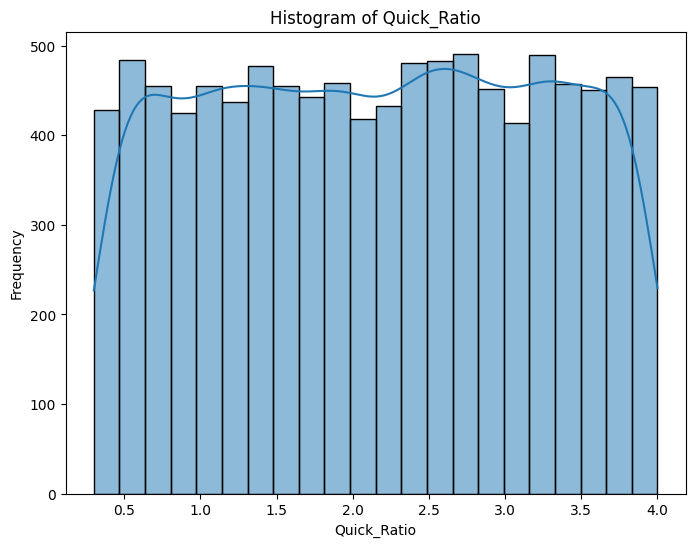

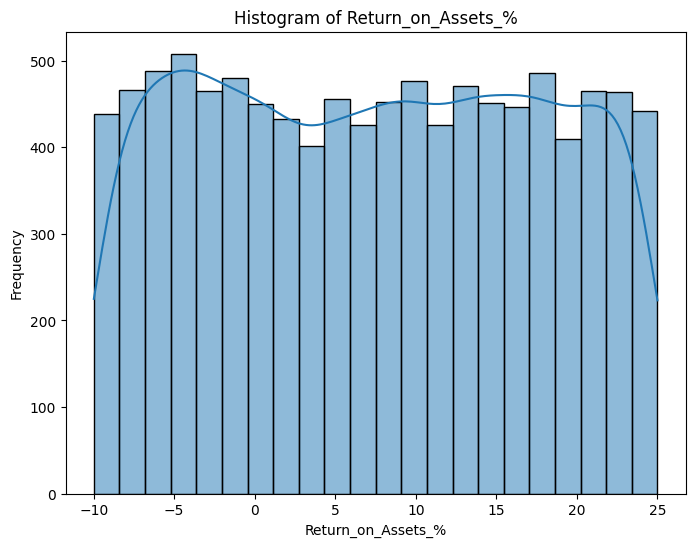

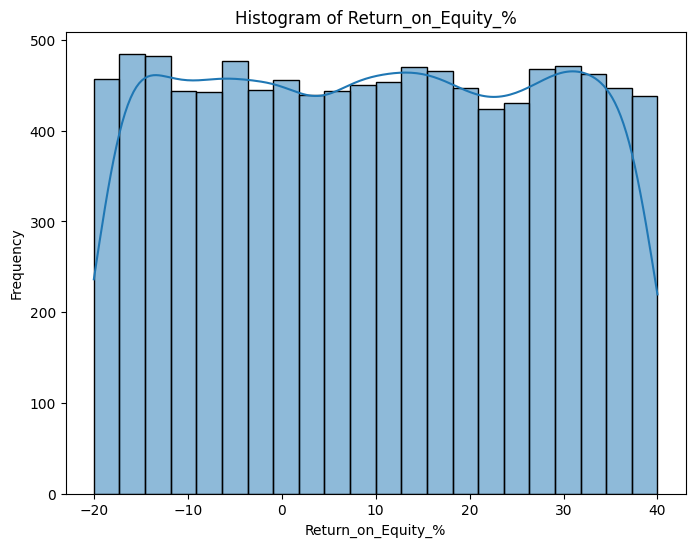

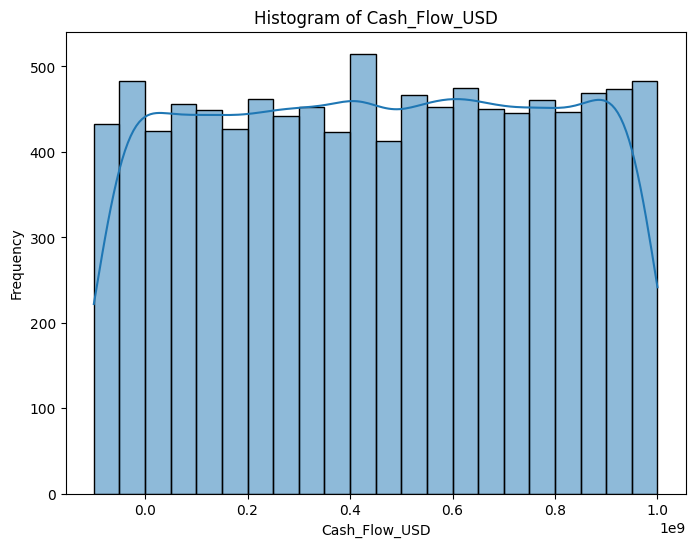

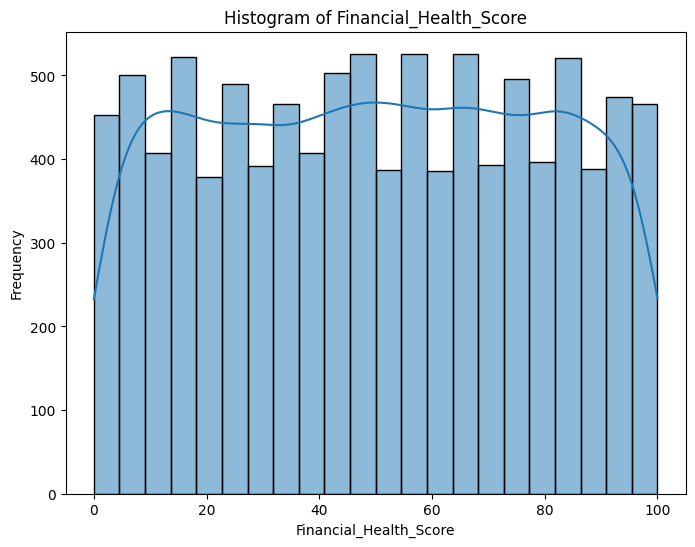

In [12]:
# prompt: plot histograms of each numerical column in Financial_health_data and calculate skewness and kurtosis along with it

import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = Financial_health_data.select_dtypes(include=['number']).columns

for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.histplot(Financial_health_data[col].dropna(), kde=True)
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()


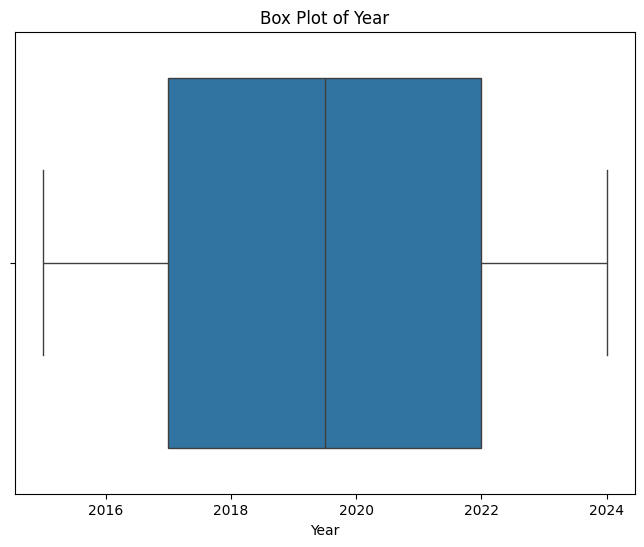

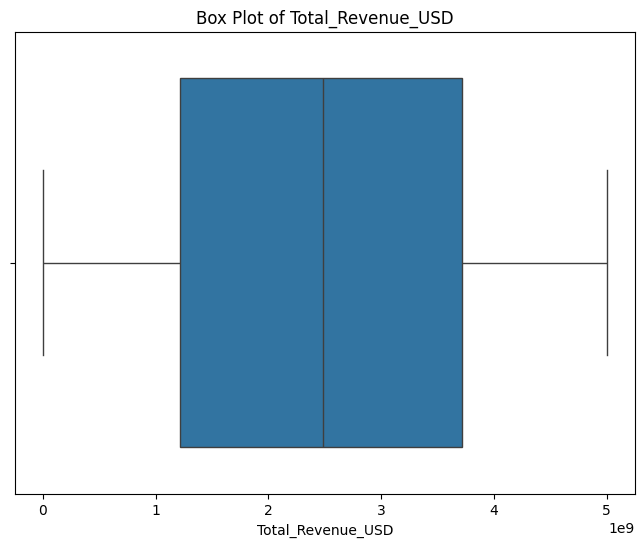

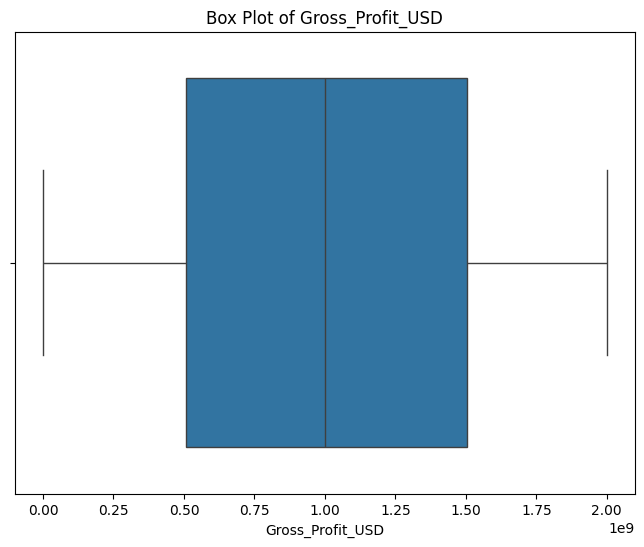

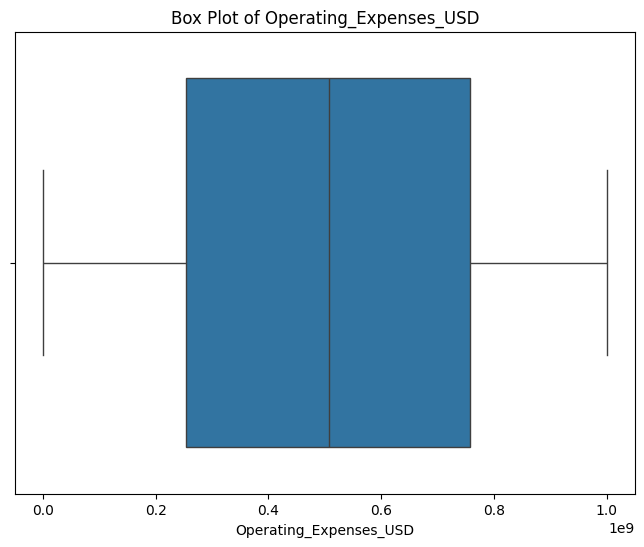

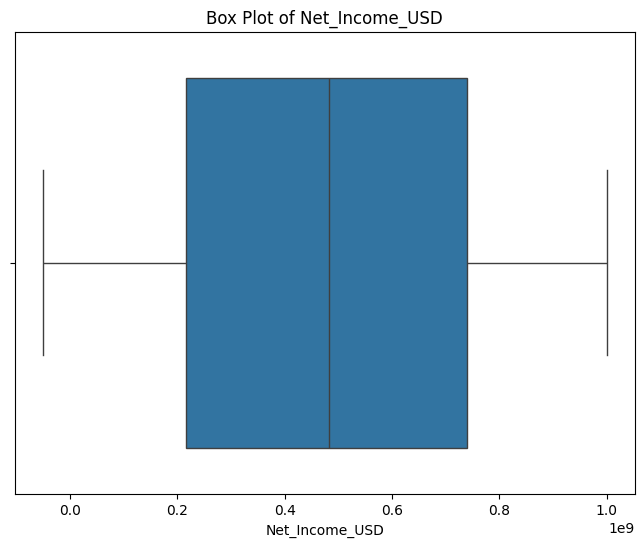

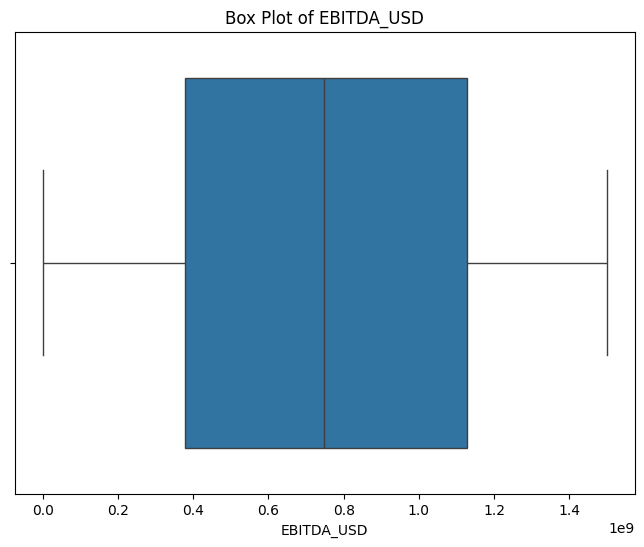

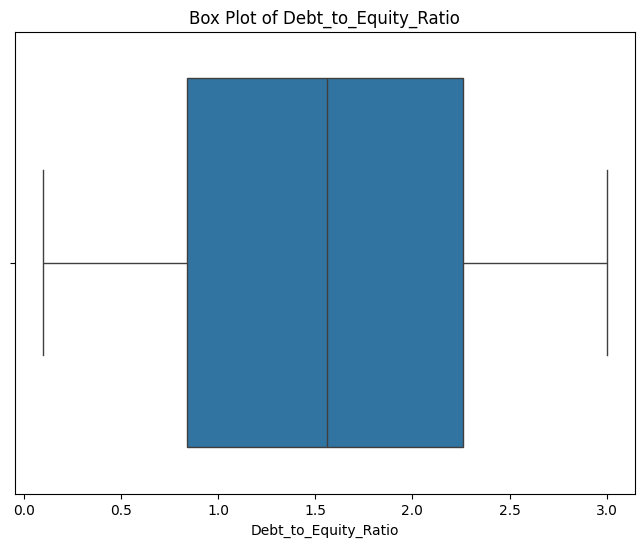

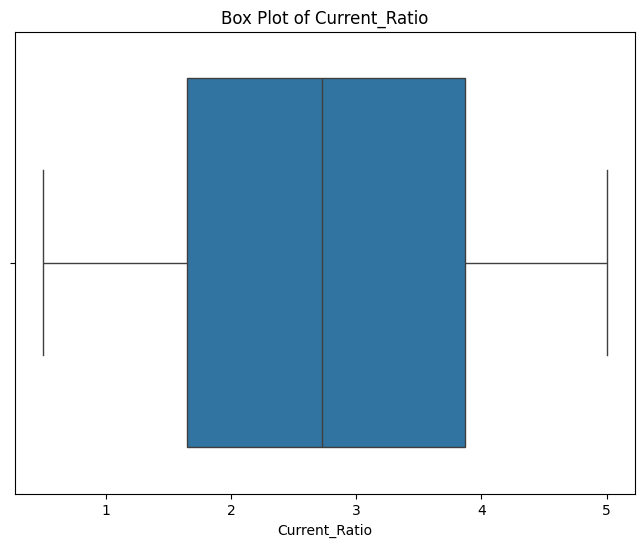

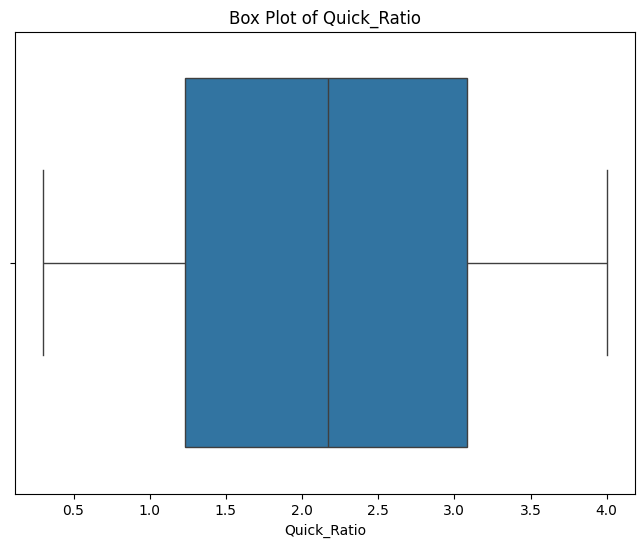

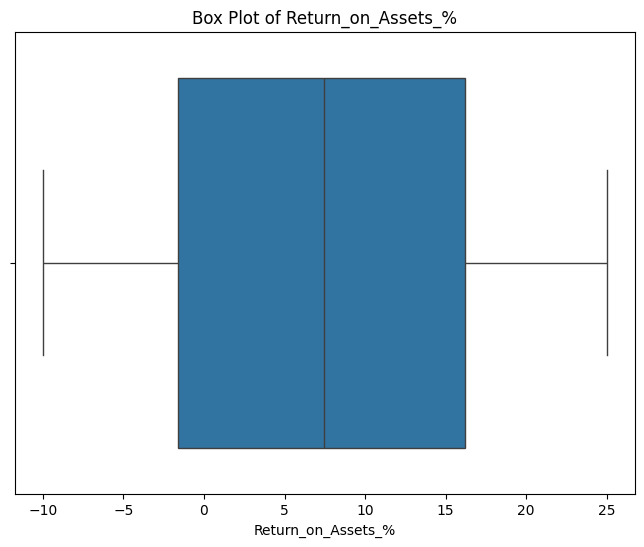

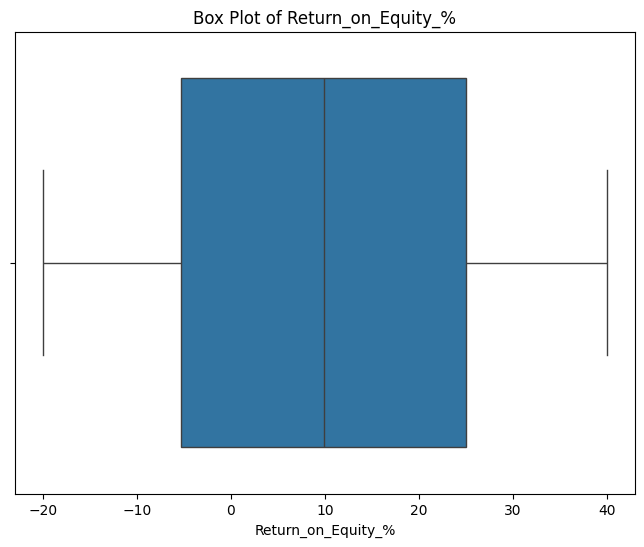

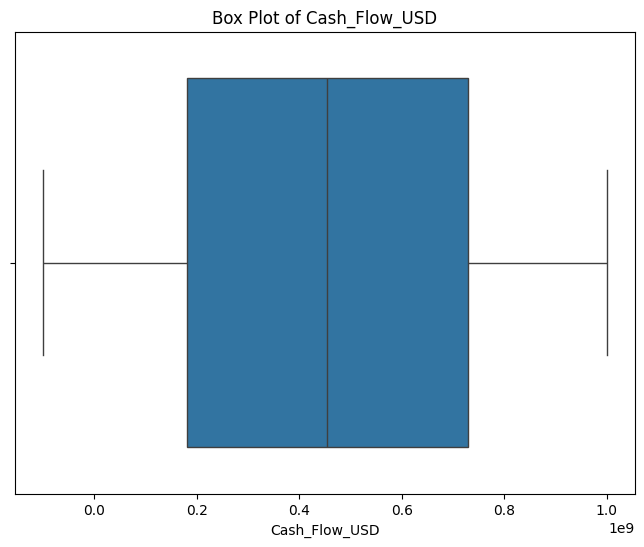

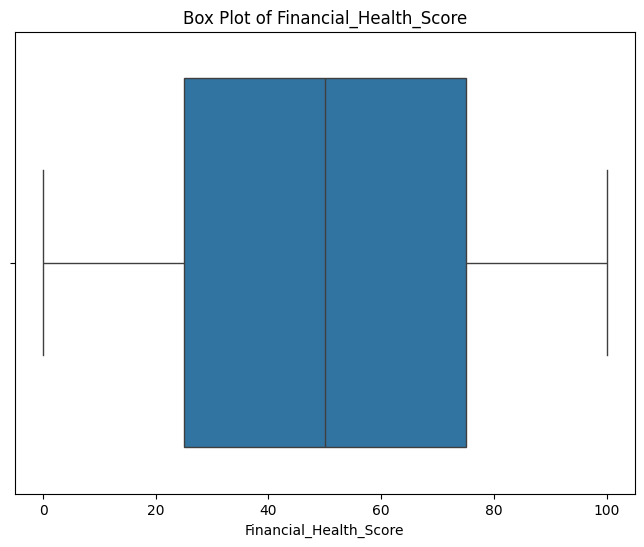

In [13]:
# prompt: plot box plots of each numerical column in Financial_health_data

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=Financial_health_data[col].dropna())
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

In [14]:
# prompt: detect outliers in numerical columns of Financial_health_data

# Function to detect outliers using IQR
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Detect and print outliers for each numerical column
for col in numerical_cols:
    outliers = detect_outliers_iqr(Financial_health_data, col)
    print(f"Outliers in '{col}':")
    print(outliers)
    print("-" * 30)

Outliers in 'Year':
Empty DataFrame
Columns: [Company_Name, Industry, Year, Total_Revenue_USD, Gross_Profit_USD, Operating_Expenses_USD, Net_Income_USD, EBITDA_USD, Debt_to_Equity_Ratio, Current_Ratio, Quick_Ratio, Return_on_Assets_%, Return_on_Equity_%, Cash_Flow_USD, Financial_Health_Score, Credit_Rating]
Index: []
------------------------------
Outliers in 'Total_Revenue_USD':
Empty DataFrame
Columns: [Company_Name, Industry, Year, Total_Revenue_USD, Gross_Profit_USD, Operating_Expenses_USD, Net_Income_USD, EBITDA_USD, Debt_to_Equity_Ratio, Current_Ratio, Quick_Ratio, Return_on_Assets_%, Return_on_Equity_%, Cash_Flow_USD, Financial_Health_Score, Credit_Rating]
Index: []
------------------------------
Outliers in 'Gross_Profit_USD':
Empty DataFrame
Columns: [Company_Name, Industry, Year, Total_Revenue_USD, Gross_Profit_USD, Operating_Expenses_USD, Net_Income_USD, EBITDA_USD, Debt_to_Equity_Ratio, Current_Ratio, Quick_Ratio, Return_on_Assets_%, Return_on_Equity_%, Cash_Flow_USD, Finan

# **5. Bivariate Analysis**

•	Plot scatter plots of each variable with the dependent variable to understand if there is a linear relationship between them


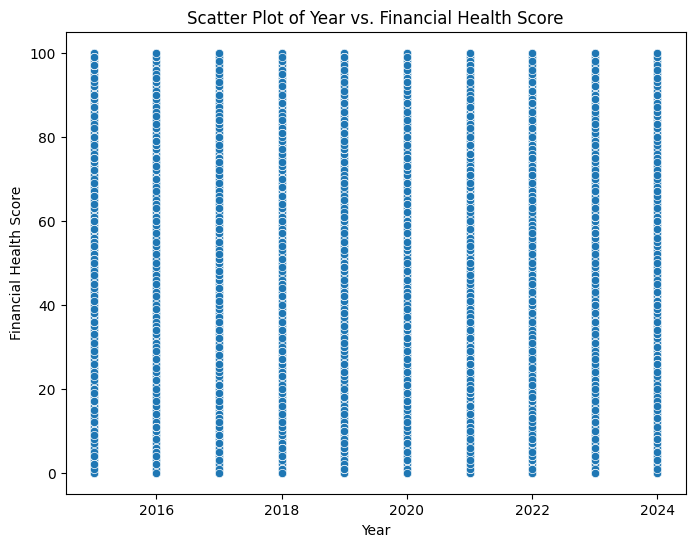

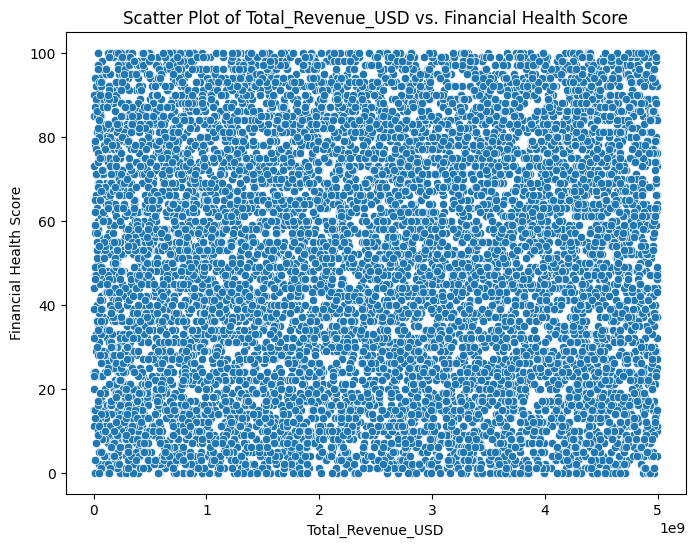

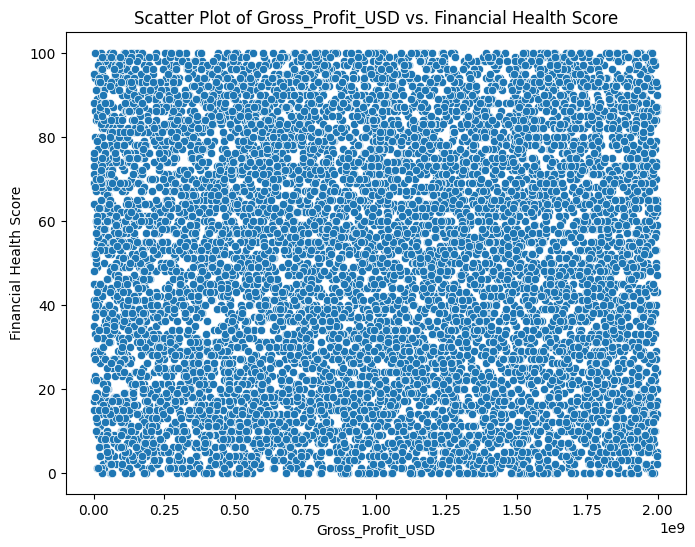

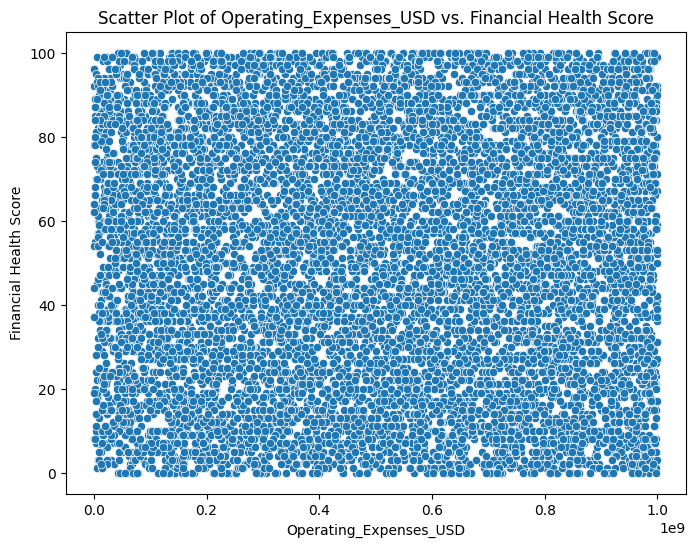

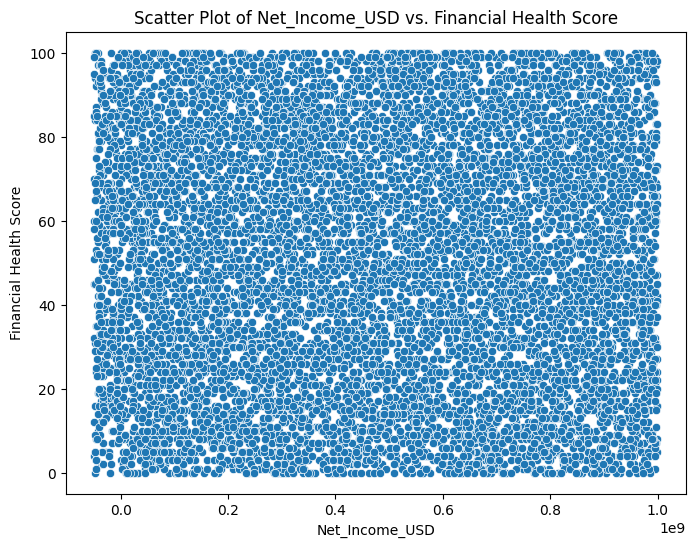

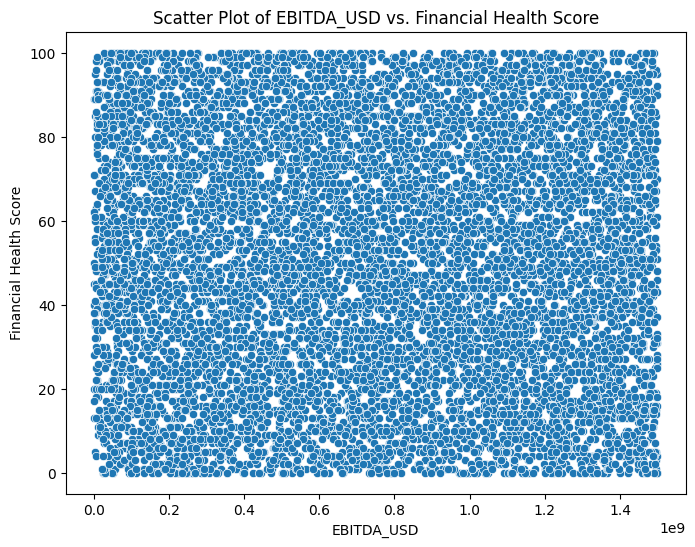

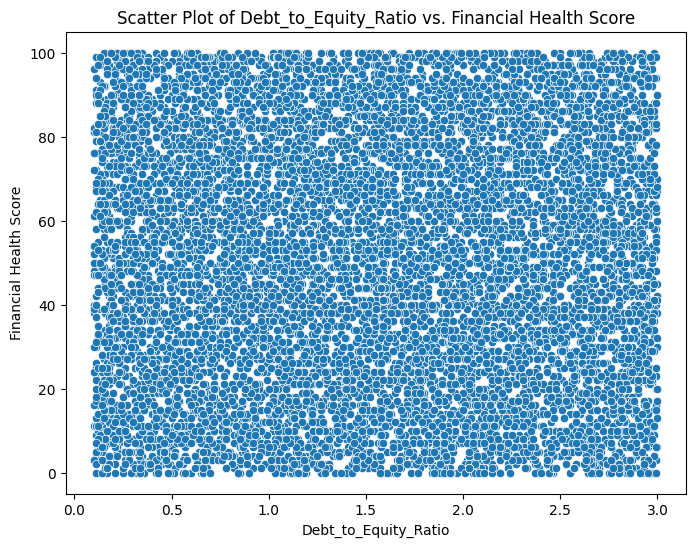

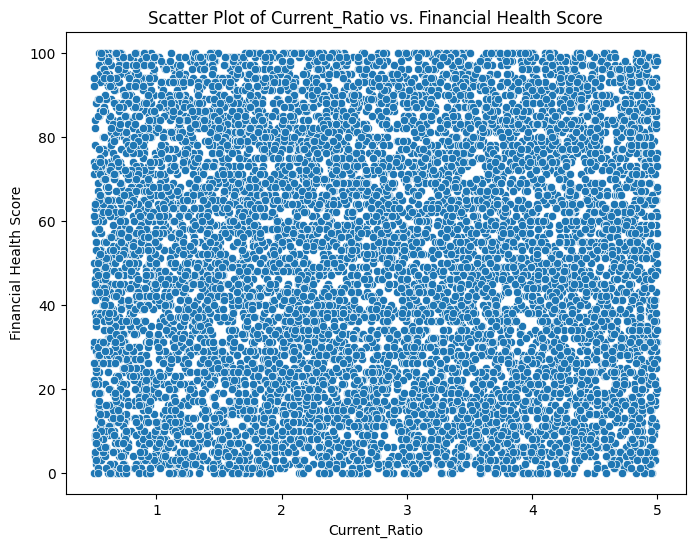

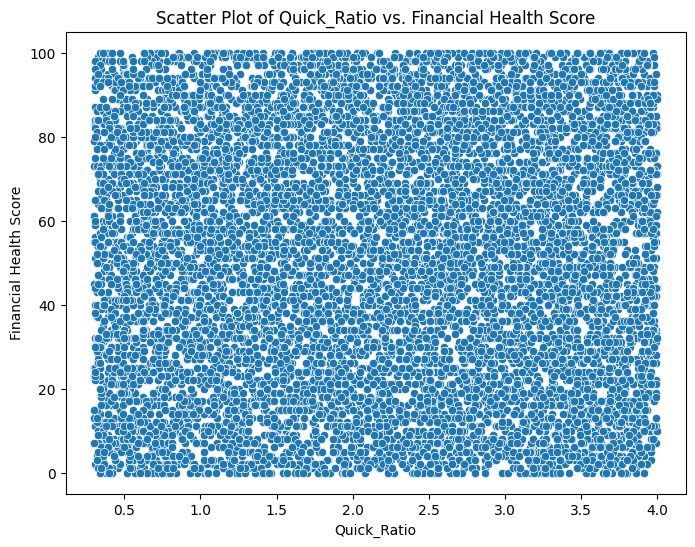

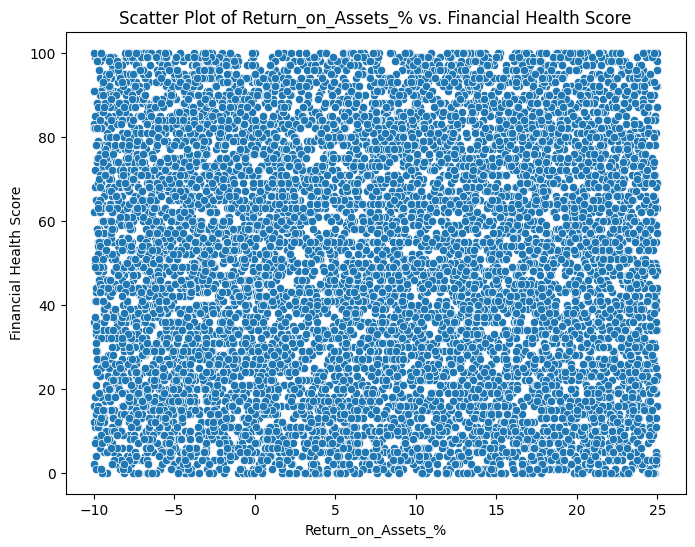

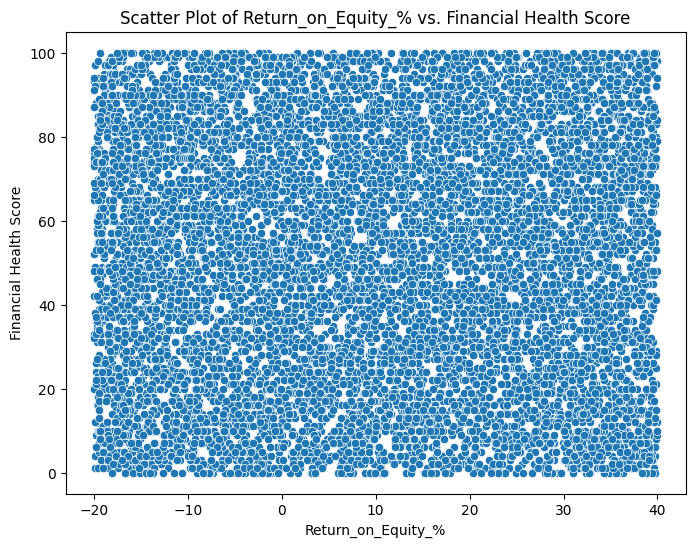

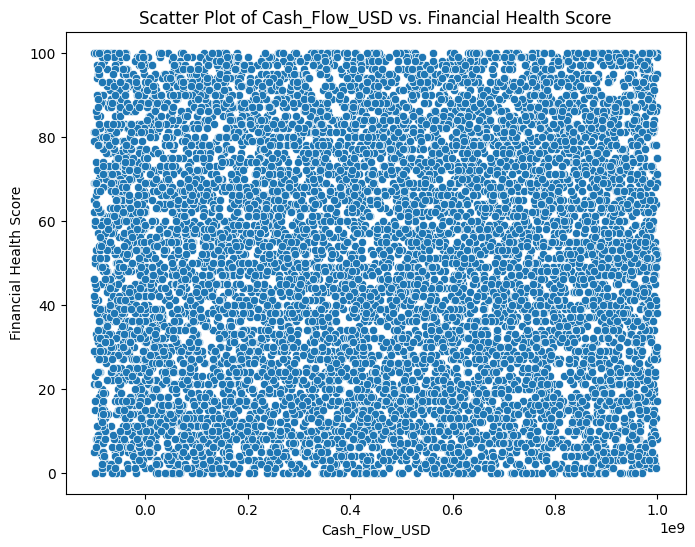


Checking for correlation coefficients:
Year                      0.008024
Total_Revenue_USD         0.008753
Gross_Profit_USD         -0.010173
Operating_Expenses_USD   -0.005430
Net_Income_USD           -0.014070
EBITDA_USD               -0.008310
Debt_to_Equity_Ratio     -0.010336
Current_Ratio             0.001460
Quick_Ratio               0.008432
Return_on_Assets_%       -0.011703
Return_on_Equity_%       -0.001815
Cash_Flow_USD             0.016605
Financial_Health_Score    1.000000
Name: Financial_Health_Score, dtype: float64


In [15]:
# prompt: plot all numerical columns of Financial_health_data in scatter plots against Financial_Health_Score and check if they have a linear relationship

# Plot scatter plots for numerical columns against Financial_Health_Score
for col in numerical_cols:
    if col != 'Financial_Health_Score':  # Avoid plotting a variable against itself
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=Financial_health_data[col], y=Financial_health_data['Financial_Health_Score'])
        plt.title(f'Scatter Plot of {col} vs. Financial Health Score')
        plt.xlabel(col)
        plt.ylabel('Financial Health Score')
        plt.show()

# To check for linear relationship, you can visually inspect the scatter plots.
# If the points tend to cluster along a straight line, a linear relationship is likely.
# For a more rigorous check, you could calculate the correlation coefficient.

print("\nChecking for correlation coefficients:")
correlation_matrix = Financial_health_data[numerical_cols].corr()
print(correlation_matrix['Financial_Health_Score'])

# A correlation coefficient close to 1 or -1 suggests a strong linear relationship.
# A coefficient close to 0 suggests a weak or no linear relationship.

# **6. Multivariate Analysis**

•	Calculate the correlation of each independent variable with the dependent variable

•	Identify multicollinearity amongst the independent variables by calculating a correlation matrix



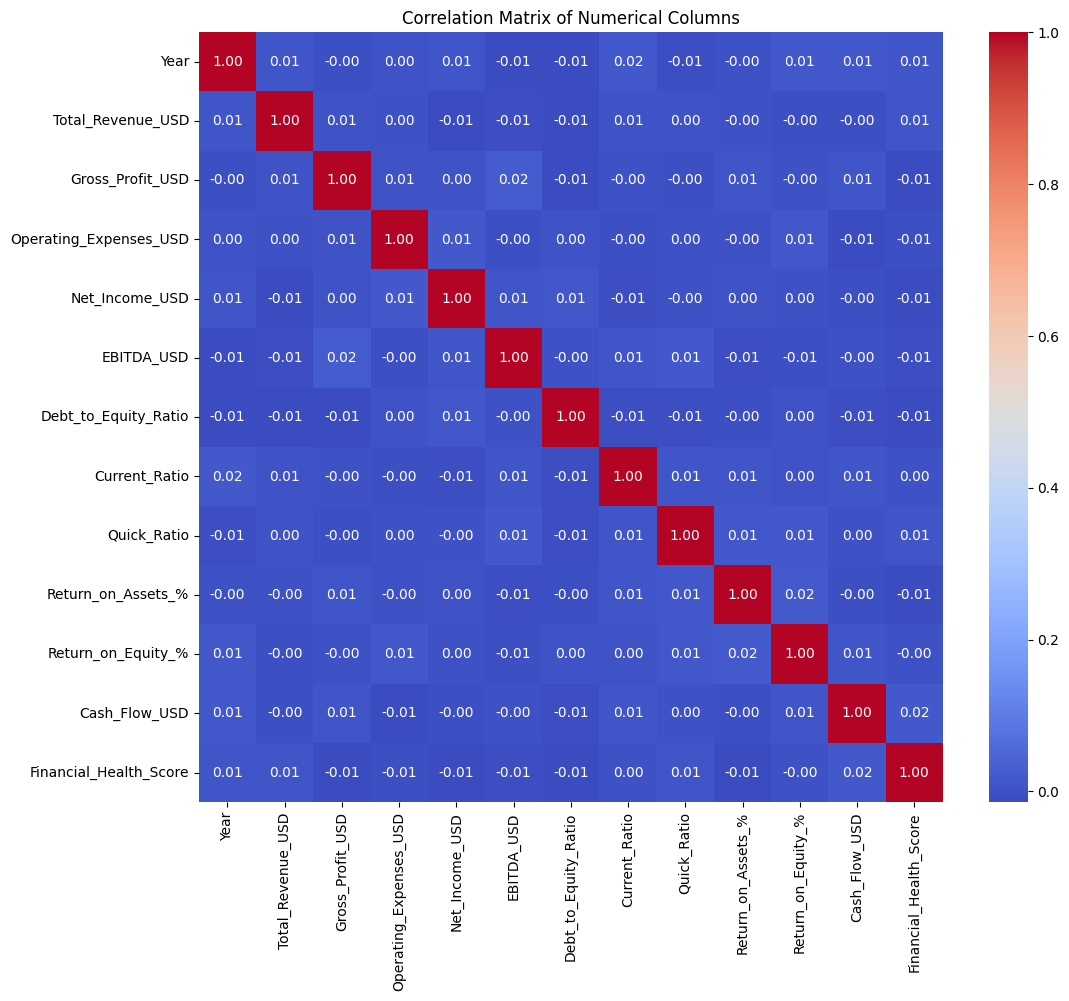

In [16]:
# prompt: create a correlation matrix of all numerical columns of Financial_Health_Score

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

In [17]:
# prompt: calculate VIF all numerical columns of Financial_Health_Score

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numerical columns for VIF calculation
numerical_data = Financial_health_data[numerical_cols]

# Calculate VIF for each numerical column
vif_data = pd.DataFrame()
vif_data["Variable"] = numerical_data.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_data.values, i) for i in range(numerical_data.shape[1])]

print("\nVariance Inflation Factor (VIF) for numerical columns:")
vif_data



Variance Inflation Factor (VIF) for numerical columns:


Variable        VIF
0                     Year  33.420291
1        Total_Revenue_USD   1.000561
2         Gross_Profit_USD   1.001011
3   Operating_Expenses_USD   1.000541
4           Net_Income_USD   1.000851
5               EBITDA_USD   1.001000
6     Debt_to_Equity_Ratio   1.000665
7            Current_Ratio   1.000457
8              Quick_Ratio   1.000682
9       Return_on_Assets_%   1.000858
10      Return_on_Equity_%   1.000733
11           Cash_Flow_USD   1.000849
12  Financial_Health_Score   1.001088

# **7. Label Encoding**

•	Convert non-numeric categorical variables into numeric form for analysis by using an appropriate encoding method


In [18]:
# prompt: convert all categorical columns (company name, Industry, credit rating) of Financial_Health_Score into numerical columns using label_encoder and store encoded data in a new df

from sklearn.preprocessing import LabelEncoder

# Create a copy of the original DataFrame to store encoded data
Financial_health_encoded = Financial_health_data.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['Company_Name', 'Industry', 'Credit_Rating']

# Apply Label Encoding to each categorical column
for col in categorical_cols:
  Financial_health_encoded[col] = label_encoder.fit_transform(Financial_health_encoded[col])

# Display the head of the new DataFrame with encoded columns
print("DataFrame with encoded categorical columns:")
Financial_health_encoded.head()

DataFrame with encoded categorical columns:


Company_Name  Industry  Year  Total_Revenue_USD  Gross_Profit_USD  \
0           637         1  2015       1.027334e+09      1.179003e+09   
1           281         1  2016       9.054109e+08      1.339129e+09   
2           161         4  2017       4.702907e+09      9.444073e+08   
3           442         4  2018       1.307339e+09      4.877999e+08   
4           813         2  2019       1.874920e+09      1.798042e+09   

   Operating_Expenses_USD  Net_Income_USD    EBITDA_USD  Debt_to_Equity_Ratio  \
0            3.049560e+08    7.468690e+08  1.264810e+09                  2.25   
1            4.871704e+08    8.189346e+08  1.178403e+09                  1.74   
2            1.190481e+08    4.433828e+08  9.167690e+08                  2.33   
3            9.940402e+08    3.346814e+08  7.426552e+08                  0.59   
4            3.430495e+08    6.454143e+08  1.458184e+08                  0.17   

   Current_Ratio  Quick_Ratio  Return_on_Assets_%  Return_on_Equity_%  \
0           4.72         4.00               13.36               11.14   
1           4.03         1.42                3.24               31.60   
2           2.99         1.33                8.57               25.71   
3           2.18         3.15               11.46              -19.48   
4           2.05         2.58               12.45               14.14   

   Cash_Flow_USD  Financial_Health_Score  Credit_Rating  
0   8.774030e+08                      71              6  
1   7.480579e+08                      79              5  
2   3.967697e+08                      17              5  
3   4.637669e+08                      73              6  
4   8.941684e+08                      78              6

In [19]:
Financial_health_encoded

Company_Name  Industry  Year  Total_Revenue_USD  Gross_Profit_USD  \
0              637         1  2015       1.027334e+09      1.179003e+09   
1              281         1  2016       9.054109e+08      1.339129e+09   
2              161         4  2017       4.702907e+09      9.444073e+08   
3              442         4  2018       1.307339e+09      4.877999e+08   
4              813         2  2019       1.874920e+09      1.798042e+09   
...            ...       ...   ...                ...               ...   
9995           309         5  2020       4.250388e+09      1.409481e+09   
9996           956         2  2021       3.999297e+09      1.690308e+09   
9997           164         1  2022       3.908384e+09      1.209838e+09   
9998           676         3  2023       4.661478e+09      1.251007e+09   
9999           144         0  2024       1.873369e+09      9.932118e+08   

      Operating_Expenses_USD  Net_Income_USD    EBITDA_USD  \
0               3.049560e+08    7.468690e+08  1.264810e+09   
1               4.871704e+08    8.189346e+08  1.178403e+09   
2               1.190481e+08    4.433828e+08  9.167690e+08   
3               9.940402e+08    3.346814e+08  7.426552e+08   
4               3.430495e+08    6.454143e+08  1.458184e+08   
...                      ...             ...           ...   
9995            7.107639e+08    6.714215e+08  3.325362e+08   
9996            1.601995e+07    3.498803e+08  5.573327e+07   
9997            7.019297e+08    6.473550e+08  1.483233e+09   
9998            7.867733e+08    3.972234e+08  9.774684e+06   
9999            6.965629e+08   -1.886783e+07  9.265212e+08   

      Debt_to_Equity_Ratio  Current_Ratio  Quick_Ratio  Return_on_Assets_%  \
0                     2.25           4.72         4.00               13.36   
1                     1.74           4.03         1.42                3.24   
2                     2.33           2.99         1.33                8.57   
3                     0.59           2.18         3.15               11.46   
4                     0.17           2.05         2.58               12.45   
...                    ...            ...          ...                 ...   
9995                  1.13           2.33         3.08               -4.07   
9996                  1.78           1.83         1.18                5.32   
9997                  0.49           1.43         2.13               17.54   
9998                  2.50           1.56         0.67                9.43   
9999                  2.30           4.11         2.29               10.06   

      Return_on_Equity_%  Cash_Flow_USD  Financial_Health_Score  Credit_Rating  
0                  11.14   8.774030e+08                      71              6  
1                  31.60   7.480579e+08                      79              5  
2                  25.71   3.967697e+08                      17              5  
3                 -19.48   4.637669e+08                      73              6  
4                  14.14   8.941684e+08                      78              6  
...                  ...            ...                     ...            ...  
9995               14.23   6.418490e+08                      35              0  
9996               27.79   8.596194e+08                      71              8  
9997               -7.77   7.841647e+08                      21              3  
9998                2.43   2.441462e+08                      78              5  
9999              -11.97   5.441210e+07                      34              8  

[10000 rows x 16 columns]

# **Regression Steps:**

**Hypothesis Statement:**

To test whether at least one of the thirteen independent variables has a statistically significant impact on the Financial Health Score of a company.

1. Seperate Dependent (Y) And Independendent (X) Variables

2. Extract Multiple Linear Regression Model and identify the significant variables (p<alpha)

3. Again, perform Regression analysis on the data and keep on eliminating insignificant variables – Stepwise Regression

4. Once all the independent variables come out to be significant, check the overall significance of the model from the ANOVA table (F-statistic & p-value), and if the whole equation comes out to be significant, apply the model to the data

5. Perform Model Diagnostics

In [20]:
# prompt: create Y variable as Financial health score from Financial_health_encoded and rest of the columns as X variable

Y = Financial_health_encoded['Financial_Health_Score']
X = Financial_health_encoded.drop('Financial_Health_Score', axis=1)

In [21]:
Y

0       71
1       79
2       17
3       73
4       78
        ..
9995    35
9996    71
9997    21
9998    78
9999    34
Name: Financial_Health_Score, Length: 10000, dtype: int64

In [22]:
X

Company_Name  Industry  Year  Total_Revenue_USD  Gross_Profit_USD  \
0              637         1  2015       1.027334e+09      1.179003e+09   
1              281         1  2016       9.054109e+08      1.339129e+09   
2              161         4  2017       4.702907e+09      9.444073e+08   
3              442         4  2018       1.307339e+09      4.877999e+08   
4              813         2  2019       1.874920e+09      1.798042e+09   
...            ...       ...   ...                ...               ...   
9995           309         5  2020       4.250388e+09      1.409481e+09   
9996           956         2  2021       3.999297e+09      1.690308e+09   
9997           164         1  2022       3.908384e+09      1.209838e+09   
9998           676         3  2023       4.661478e+09      1.251007e+09   
9999           144         0  2024       1.873369e+09      9.932118e+08   

      Operating_Expenses_USD  Net_Income_USD    EBITDA_USD  \
0               3.049560e+08    7.468690e+08  1.264810e+09   
1               4.871704e+08    8.189346e+08  1.178403e+09   
2               1.190481e+08    4.433828e+08  9.167690e+08   
3               9.940402e+08    3.346814e+08  7.426552e+08   
4               3.430495e+08    6.454143e+08  1.458184e+08   
...                      ...             ...           ...   
9995            7.107639e+08    6.714215e+08  3.325362e+08   
9996            1.601995e+07    3.498803e+08  5.573327e+07   
9997            7.019297e+08    6.473550e+08  1.483233e+09   
9998            7.867733e+08    3.972234e+08  9.774684e+06   
9999            6.965629e+08   -1.886783e+07  9.265212e+08   

      Debt_to_Equity_Ratio  Current_Ratio  Quick_Ratio  Return_on_Assets_%  \
0                     2.25           4.72         4.00               13.36   
1                     1.74           4.03         1.42                3.24   
2                     2.33           2.99         1.33                8.57   
3                     0.59           2.18         3.15               11.46   
4                     0.17           2.05         2.58               12.45   
...                    ...            ...          ...                 ...   
9995                  1.13           2.33         3.08               -4.07   
9996                  1.78           1.83         1.18                5.32   
9997                  0.49           1.43         2.13               17.54   
9998                  2.50           1.56         0.67                9.43   
9999                  2.30           4.11         2.29               10.06   

      Return_on_Equity_%  Cash_Flow_USD  Credit_Rating  
0                  11.14   8.774030e+08              6  
1                  31.60   7.480579e+08              5  
2                  25.71   3.967697e+08              5  
3                 -19.48   4.637669e+08              6  
4                  14.14   8.941684e+08              6  
...                  ...            ...            ...  
9995               14.23   6.418490e+08              0  
9996               27.79   8.596194e+08              8  
9997               -7.77   7.841647e+08              3  
9998                2.43   2.441462e+08              5  
9999              -11.97   5.441210e+07              8  

[10000 rows x 15 columns]

In [23]:
# prompt: extract multiple linear regression of X and Y and display model summary

import statsmodels.api as sm

# Add a constant to the independent variables (X)
X = sm.add_constant(X)

# Create and fit the OLS model
model = sm.OLS(Y, X).fit()

# Print the model summary
print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     Financial_Health_Score   R-squared:                       0.001
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                    0.8735
Date:                    Tue, 22 Jul 2025   Prob (F-statistic):              0.594
Time:                            09:26:06   Log-Likelihood:                -47825.
No. Observations:                   10000   AIC:                         9.568e+04
Df Residuals:                        9984   BIC:                         9.580e+04
Df Model:                              15                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [24]:
# prompt: eliminate the x variables having p-value>0.05 and extract the MLR model with model summary, start with x variable having highest p-value

while True:
    p_values = model.pvalues.drop('const') # Exclude the constant term
    max_p_value = p_values.max()

    if max_p_value > 0.05:
        # Find the variable with the highest p-value
        variable_to_drop = p_values.idxmax()
        print(f"Dropping variable '{variable_to_drop}' with p-value: {max_p_value:.4f}")
        # Drop the variable with the highest p-value
        X = X.drop(variable_to_drop, axis=1)

        # Refit the model
        model = sm.OLS(Y, X).fit()
        print(model.summary())
    else:
        print("\nAll variables have p-values <= 0.05. Model refinement complete.")
        break

# Print the final model summary
print("\nFinal Model Summary:")
print(model.summary())

Dropping variable 'Current_Ratio' with p-value: 0.9173
                              OLS Regression Results                              
Dep. Variable:     Financial_Health_Score   R-squared:                       0.001
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                    0.9353
Date:                    Tue, 22 Jul 2025   Prob (F-statistic):              0.519
Time:                            09:26:06   Log-Likelihood:                -47825.
No. Observations:                   10000   AIC:                         9.568e+04
Df Residuals:                        9985   BIC:                         9.579e+04
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [25]:
Financial_health_encoded['Industry'].unique()

array([1, 4, 2, 3, 6, 5, 0])

# **Industry-wise Regression Analysis**

1. Repeat the above steps for each industry by looping through the industry code from 0 to 6, and build one regression model per industry

2. Identify variables that are consistently significant across industries



# **Indutry 0 - Energy**

In [26]:
# prompt:  extract multiple linear regression of X and Y and display model summary where industry = 0. eliminate the x variables having p-value>0.05 and extract the MLR model with model summary, start with x variable having highest p-value

# Filter the DataFrame for industry 0
Financial_health_industry_0 = Financial_health_encoded[Financial_health_encoded['Industry'] == 0].copy()

# Define the dependent and independent variables for industry 0
Y_industry_0 = Financial_health_industry_0['Financial_Health_Score']
X_industry_0 = Financial_health_industry_0.drop('Financial_Health_Score', axis=1)

# Add a constant to the independent variables (X) for industry 0
X_industry_0 = sm.add_constant(X_industry_0)

# Create and fit the OLS model for industry 0
model_industry_0 = sm.OLS(Y_industry_0, X_industry_0).fit()

# Print the initial model summary for industry 0
print("Initial Model Summary for Industry = 0:")
print(model_industry_0.summary())

# Iteratively remove variables with p-value > 0.05, starting with the highest p-value
while True:
    p_values_industry_0 = model_industry_0.pvalues.drop('const', errors='ignore') # Exclude the constant term, handle case where only const remains
    if p_values_industry_0.empty:
        print("\nNo more variables to drop for Industry = 0.")
        break

    max_p_value_industry_0 = p_values_industry_0.max()

    if max_p_value_industry_0 > 0.05:
        # Find the variable with the highest p-value
        variable_to_drop_industry_0 = p_values_industry_0.idxmax()
        print(f"\nDropping variable '{variable_to_drop_industry_0}' with p-value: {max_p_value_industry_0:.4f} for Industry = 0")

        # Drop the variable with the highest p-value from the X DataFrame for industry 0
        X_industry_0 = X_industry_0.drop(variable_to_drop_industry_0, axis=1)

        # Refit the model for industry 0
        model_industry_0 = sm.OLS(Y_industry_0, X_industry_0).fit()
        print(model_industry_0.summary())
    else:
        print("\nAll variables have p-values <= 0.05 for Industry = 0. Model refinement complete.")
        break

# Print the final model summary for industry 0
print("\nFinal Model Summary for Industry = 0:")
print(model_industry_0.summary())


Initial Model Summary for Industry = 0:
                              OLS Regression Results                              
Dep. Variable:     Financial_Health_Score   R-squared:                       0.015
Model:                                OLS   Adj. R-squared:                  0.005
Method:                     Least Squares   F-statistic:                     1.565
Date:                    Tue, 22 Jul 2025   Prob (F-statistic):             0.0821
Time:                            09:26:07   Log-Likelihood:                -6908.5
No. Observations:                    1452   AIC:                         1.385e+04
Df Residuals:                        1437   BIC:                         1.393e+04
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------


White Test for Heteroscedasticity (Industry = 0):
LM Statistic: 20.7853
LM p-value: 0.0009
F Statistic: 4.2000
F p-value: 0.0009


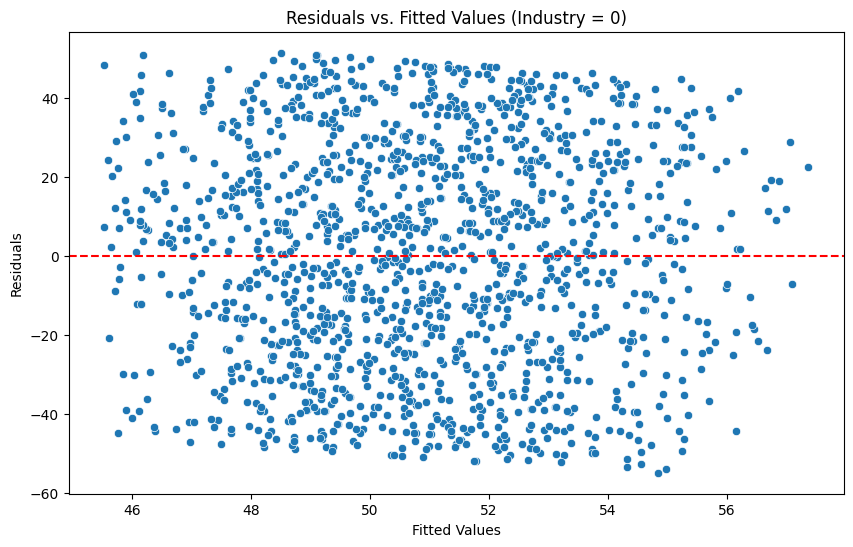

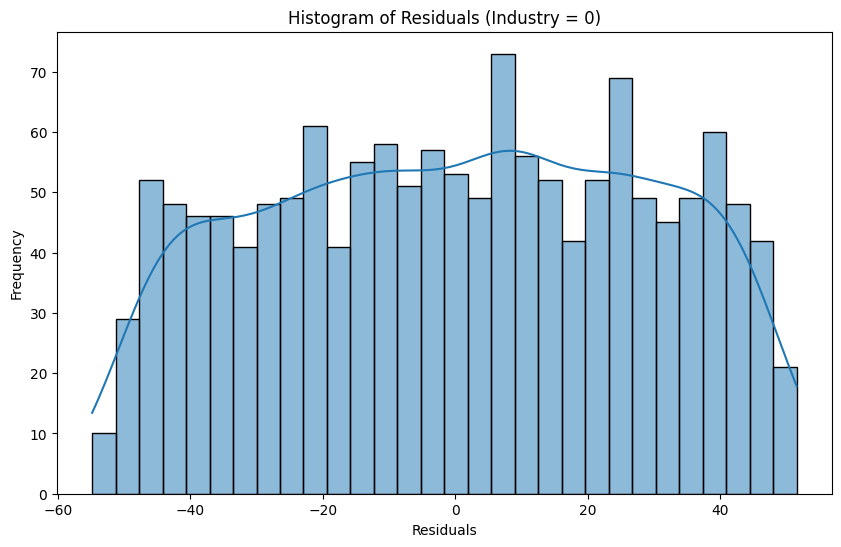

In [27]:
# prompt: check model diagnostics, plot all errors in a scatter plot and a histogram with line, run white test to check homoscedasticity

# Check for heteroscedasticity using the White test
from statsmodels.stats.diagnostic import het_white

# Perform the White test on the final model (model_industry_0)
white_test = het_white(model_industry_0.resid, model_industry_0.model.exog)
# The output of het_white is a tuple: (LM statistic, LM p-value, F-statistic, F p-value)
lm_statistic, lm_p_value, f_statistic, f_p_value = white_test

print("\nWhite Test for Heteroscedasticity (Industry = 0):")
print(f"LM Statistic: {lm_statistic:.4f}")
print(f"LM p-value: {lm_p_value:.4f}")
print(f"F Statistic: {f_statistic:.4f}")
print(f"F p-value: {f_p_value:.4f}")

# Interpretation of White test:
# If the p-value is less than your chosen significance level (commonly 0.05),
# you reject the null hypothesis of homoscedasticity, suggesting heteroscedasticity is present.


# Get the residuals (errors) from the final model (model_industry_0)
residuals = model_industry_0.resid

# Plotting the residuals

# Scatter plot of residuals vs. fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model_industry_0.fittedvalues, y=residuals)
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0
plt.title('Residuals vs. Fitted Values (Industry = 0)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Interpretation of scatter plot:
# If the residuals are randomly scattered around the zero line with no clear pattern,
# it suggests homoscedasticity. If there is a pattern (e.g., increasing or decreasing spread
# as fitted values increase), it suggests heteroscedasticity.

# Histogram with line for the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30) # kde=True plots the density line
plt.title('Histogram of Residuals (Industry = 0)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Interpretation of histogram:
# For a well-fitted model under classical assumptions, residuals should be approximately normally distributed (bell-shaped).


# **Industry 1 - Finance**

In [28]:
# prompt:  extract multiple linear regression of X and Y and display model summary where industry = 1. eliminate the x variables having p-value>0.05 and extract the MLR model with model summary, start with x variable having highest p-value, do not remove constant

# Filter the DataFrame for industry 1
Financial_health_industry_1 = Financial_health_encoded[Financial_health_encoded['Industry'] == 1].copy()

# Define the dependent and independent variables for industry 1
Y_industry_1 = Financial_health_industry_1['Financial_Health_Score']
X_industry_1 = Financial_health_industry_1.drop('Financial_Health_Score', axis=1)

# Add a constant to the independent variables (X) for industry 1
X_industry_1 = sm.add_constant(X_industry_1)

# Create and fit the OLS model for industry 1
model_industry_1 = sm.OLS(Y_industry_1, X_industry_1).fit()

# Print the initial model summary for industry 1
print("Initial Model Summary for Industry = 1:")
print(model_industry_1.summary())

# Iteratively remove variables with p-value > 0.05, starting with the highest p-value
while True:
    p_values_industry_1 = model_industry_1.pvalues.drop('const', errors='ignore') # Exclude the constant term, handle case where only const remains
    if p_values_industry_1.empty:
        print("\nNo more variables to drop for Industry = 1.")
        break

    max_p_value_industry_1 = p_values_industry_1.max()

    if max_p_value_industry_1 > 0.05:
        # Find the variable with the highest p-value
        variable_to_drop_industry_1 = p_values_industry_1.idxmax()
        print(f"\nDropping variable '{variable_to_drop_industry_1}' with p-value: {max_p_value_industry_1:.4f} for Industry = 1")

        # Drop the variable with the highest p-value from the X DataFrame for industry 1
        X_industry_1 = X_industry_1.drop(variable_to_drop_industry_1, axis=1)

        # Refit the model for industry 1
        model_industry_1 = sm.OLS(Y_industry_1, X_industry_1).fit()
        print(model_industry_1.summary())
    else:
        print("\nAll variables have p-values <= 0.05 for Industry = 1. Model refinement complete.")
        break

# Print the final model summary for industry 1
print("\nFinal Model Summary for Industry = 1:")
print(model_industry_1.summary())

Initial Model Summary for Industry = 1:
                              OLS Regression Results                              
Dep. Variable:     Financial_Health_Score   R-squared:                       0.006
Model:                                OLS   Adj. R-squared:                 -0.003
Method:                     Least Squares   F-statistic:                    0.6749
Date:                    Tue, 22 Jul 2025   Prob (F-statistic):              0.801
Time:                            09:26:08   Log-Likelihood:                -7017.3
No. Observations:                    1460   AIC:                         1.406e+04
Df Residuals:                        1445   BIC:                         1.414e+04
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

# **Industry 2 - Healthcare**

In [29]:
# prompt:  extract multiple linear regression of X and Y and display model summary where industry = 2. eliminate the x variables having p-value>0.05 and extract the MLR model with model summary, start with x variable having highest p-value, do not remove constant

# Filter the DataFrame for industry 2
Financial_health_industry_2 = Financial_health_encoded[Financial_health_encoded['Industry'] == 2].copy()

# Define the dependent and independent variables for industry 2
Y_industry_2 = Financial_health_industry_2['Financial_Health_Score']
X_industry_2 = Financial_health_industry_2.drop('Financial_Health_Score', axis=1)

# Add a constant to the independent variables (X) for industry 2
X_industry_2 = sm.add_constant(X_industry_2)

# Create and fit the OLS model for industry 2
model_industry_2 = sm.OLS(Y_industry_2, X_industry_2).fit()

# Print the initial model summary for industry 2
print("Initial Model Summary for Industry = 2:")
print(model_industry_2.summary())

# Iteratively remove variables with p-value > 0.05, starting with the highest p-value
while True:
    p_values_industry_2 = model_industry_2.pvalues.drop('const', errors='ignore') # Exclude the constant term, handle case where only const remains
    if p_values_industry_2.empty:
        print("\nNo more variables to drop for Industry = 2.")
        break

    max_p_value_industry_2 = p_values_industry_2.max()

    if max_p_value_industry_2 > 0.05:
        # Find the variable with the highest p-value
        variable_to_drop_industry_2 = p_values_industry_2.idxmax()
        print(f"\nDropping variable '{variable_to_drop_industry_2}' with p-value: {max_p_value_industry_2:.4f} for Industry = 2")

        # Drop the variable with the highest p-value from the X DataFrame for industry 2
        X_industry_2 = X_industry_2.drop(variable_to_drop_industry_2, axis=1)

        # Refit the model for industry 2
        model_industry_2 = sm.OLS(Y_industry_2, X_industry_2).fit()
        print(model_industry_2.summary())
    else:
        print("\nAll variables have p-values <= 0.05 for Industry = 2. Model refinement complete.")
        break

# Print the final model summary for industry 2
print("\nFinal Model Summary for Industry = 2:")
print(model_industry_2.summary())

Initial Model Summary for Industry = 2:
                              OLS Regression Results                              
Dep. Variable:     Financial_Health_Score   R-squared:                       0.008
Model:                                OLS   Adj. R-squared:                 -0.002
Method:                     Least Squares   F-statistic:                    0.7751
Date:                    Tue, 22 Jul 2025   Prob (F-statistic):              0.697
Time:                            09:26:08   Log-Likelihood:                -6697.0
No. Observations:                    1396   AIC:                         1.342e+04
Df Residuals:                        1381   BIC:                         1.350e+04
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

# **Industry 3 - IT**

In [30]:
# prompt:  extract multiple linear regression of X and Y and display model summary where industry = 3. eliminate the x variables having p-value>0.05 and extract the MLR model with model summary, start with x variable having highest p-value, do not remove constant

# Filter the DataFrame for industry 3
Financial_health_industry_3 = Financial_health_encoded[Financial_health_encoded['Industry'] == 3].copy()

# Define the dependent and independent variables for industry 3
Y_industry_3 = Financial_health_industry_3['Financial_Health_Score']
X_industry_3 = Financial_health_industry_3.drop('Financial_Health_Score', axis=1)

# Add a constant to the independent variables (X) for industry 3
X_industry_3 = sm.add_constant(X_industry_3)

# Create and fit the OLS model for industry 3
model_industry_3 = sm.OLS(Y_industry_3, X_industry_3).fit()

# Print the initial model summary for industry 3
print("Initial Model Summary for Industry = 3:")
print(model_industry_3.summary())

# Iteratively remove variables with p-value > 0.05, starting with the highest p-value
while True:
    p_values_industry_3 = model_industry_3.pvalues.drop('const', errors='ignore') # Exclude the constant term, handle case where only const remains
    if p_values_industry_3.empty:
        print("\nNo more variables to drop for Industry = 3.")
        break

    max_p_value_industry_3 = p_values_industry_3.max()

    if max_p_value_industry_3 > 0.05:
        # Find the variable with the highest p-value
        variable_to_drop_industry_3 = p_values_industry_3.idxmax()
        print(f"\nDropping variable '{variable_to_drop_industry_3}' with p-value: {max_p_value_industry_3:.4f} for Industry = 3")

        # Drop the variable with the highest p-value from the X DataFrame for industry 3
        X_industry_3 = X_industry_3.drop(variable_to_drop_industry_3, axis=1)

        # Refit the model for industry 3
        model_industry_3 = sm.OLS(Y_industry_3, X_industry_3).fit()
        print(model_industry_3.summary())
    else:
        print("\nAll variables have p-values <= 0.05 for Industry = 3. Model refinement complete.")
        break

# Print the final model summary for industry 3
print("\nFinal Model Summary for Industry = 3:")
print(model_industry_3.summary())

Initial Model Summary for Industry = 3:
                              OLS Regression Results                              
Dep. Variable:     Financial_Health_Score   R-squared:                       0.010
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                     1.042
Date:                    Tue, 22 Jul 2025   Prob (F-statistic):              0.408
Time:                            09:26:08   Log-Likelihood:                -7020.6
No. Observations:                    1469   AIC:                         1.407e+04
Df Residuals:                        1454   BIC:                         1.415e+04
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------


White Test for Heteroscedasticity (Industry = 3):
LM Statistic: -432.4261
LM p-value: 1.0000
F Statistic: -333.6281
F p-value: 1.0000


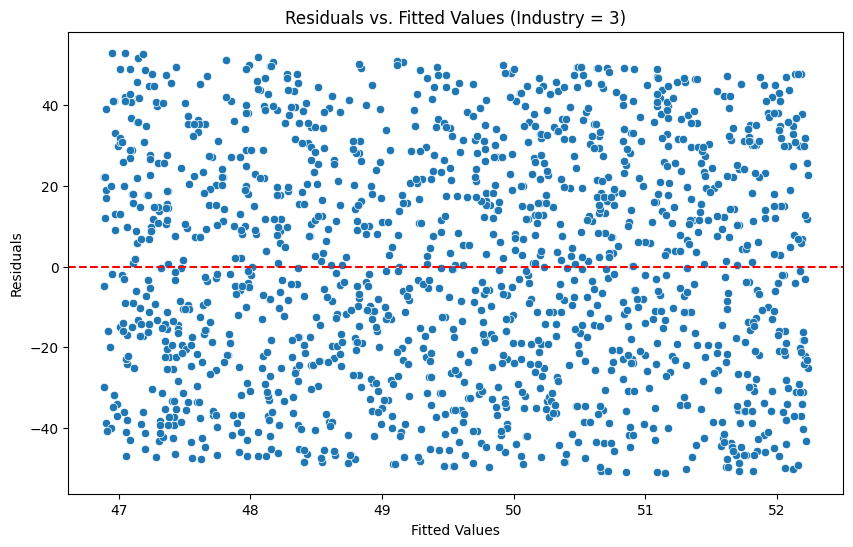

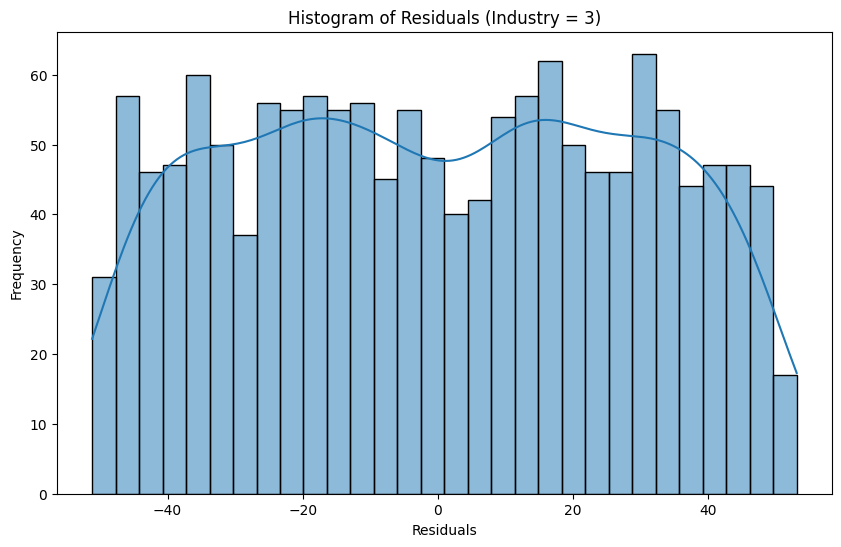

In [31]:
# prompt: check model diagnostics for the above model (for industry = 3) , plot all errors in a scatter plot and a histogram with line, run white test to check homoscedasticity

# Perform the White test on the final model (model_industry_3)
white_test_3 = het_white(model_industry_3.resid, model_industry_3.model.exog)
# The output of het_white is a tuple: (LM statistic, LM p-value, F-statistic, F p-value)
lm_statistic_3, lm_p_value_3, f_statistic_3, f_p_value_3 = white_test_3

print("\nWhite Test for Heteroscedasticity (Industry = 3):")
print(f"LM Statistic: {lm_statistic_3:.4f}")
print(f"LM p-value: {lm_p_value_3:.4f}")
print(f"F Statistic: {f_statistic_3:.4f}")
print(f"F p-value: {f_p_value_3:.4f}")

# Interpretation of White test:
# If the p-value is less than your chosen significance level (commonly 0.05),
# you reject the null hypothesis of homoscedasticity, suggesting heteroscedasticity is present.


# Get the residuals (errors) from the final model (model_industry_3)
residuals_3 = model_industry_3.resid

# Plotting the residuals

# Scatter plot of residuals vs. fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model_industry_3.fittedvalues, y=residuals_3)
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0
plt.title('Residuals vs. Fitted Values (Industry = 3)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Interpretation of scatter plot:
# If the residuals are randomly scattered around the zero line with no clear pattern,
# it suggests homoscedasticity. If there is a pattern (e.g., increasing or decreasing spread
# as fitted values increase), it suggests heteroscedasticity.

# Histogram with line for the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_3, kde=True, bins=30) # kde=True plots the density line
plt.title('Histogram of Residuals (Industry = 3)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Interpretation of histogram:
# For a well-fitted model under classical assumptions, residuals should be approximately normally distributed (bell-shaped).

# **Industry 4 - Manufacturing**

In [32]:
# prompt:  extract multiple linear regression of X and Y, add constant and display model summary where industry = 4. eliminate the x variables having p-value>0.05 and extract the MLR model with model summary, start with x variable having highest p-value, do not remove constant

# Filter the DataFrame for industry 4
Financial_health_industry_4 = Financial_health_encoded[Financial_health_encoded['Industry'] == 4].copy()

# Define the dependent and independent variables for industry 4
Y_industry_4 = Financial_health_industry_4['Financial_Health_Score']
X_industry_4 = Financial_health_industry_4.drop('Financial_Health_Score', axis=1)

# Add a constant to the independent variables (X) for industry 4
X_industry_4 = sm.add_constant(X_industry_4)

# Create and fit the OLS model for industry 4
model_industry_4 = sm.OLS(Y_industry_4, X_industry_4).fit()

# Print the initial model summary for industry 4
print("Initial Model Summary for Industry = 4:")
print(model_industry_4.summary())

# Iteratively remove variables with p-value > 0.05, starting with the highest p-value
while True:
    p_values_industry_4 = model_industry_4.pvalues.drop('const', errors='ignore') # Exclude the constant term, handle case where only const remains
    if p_values_industry_4.empty:
        print("\nNo more variables to drop for Industry = 4.")
        break

    max_p_value_industry_4 = p_values_industry_4.max()

    if max_p_value_industry_4 > 0.05:
        # Find the variable with the highest p-value
        variable_to_drop_industry_4 = p_values_industry_4.idxmax()
        print(f"\nDropping variable '{variable_to_drop_industry_4}' with p-value: {max_p_value_industry_4:.4f} for Industry = 4")

        # Drop the variable with the highest p-value from the X DataFrame for industry 4
        X_industry_4 = X_industry_4.drop(variable_to_drop_industry_4, axis=1)

        # Refit the model for industry 4
        model_industry_4 = sm.OLS(Y_industry_4, X_industry_4).fit()
        print(model_industry_4.summary())
    else:
        print("\nAll variables have p-values <= 0.05 for Industry = 4. Model refinement complete.")
        break

# Print the final model summary for industry 4
print("\nFinal Model Summary for Industry = 4:")
print(model_industry_4.summary())

Initial Model Summary for Industry = 4:
                              OLS Regression Results                              
Dep. Variable:     Financial_Health_Score   R-squared:                       0.005
Model:                                OLS   Adj. R-squared:                 -0.005
Method:                     Least Squares   F-statistic:                    0.5090
Date:                    Tue, 22 Jul 2025   Prob (F-statistic):              0.929
Time:                            09:26:09   Log-Likelihood:                -6900.8
No. Observations:                    1446   AIC:                         1.383e+04
Df Residuals:                        1431   BIC:                         1.391e+04
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

# **Industry 5 - Retail**

In [33]:
# prompt:  extract multiple linear regression of X and Y and display model summary where industry = 5. eliminate the x variables having p-value>0.05 and extract the MLR model with model summary, start with x variable having highest p-value, do not remove constant

# Filter the DataFrame for industry 5
Financial_health_industry_5 = Financial_health_encoded[Financial_health_encoded['Industry'] == 5].copy()

# Define the dependent and independent variables for industry 5
Y_industry_5 = Financial_health_industry_5['Financial_Health_Score']
X_industry_5 = Financial_health_industry_5.drop('Financial_Health_Score', axis=1)

# Add a constant to the independent variables (X) for industry 5
X_industry_5 = sm.add_constant(X_industry_5)

# Create and fit the OLS model for industry 5
model_industry_5 = sm.OLS(Y_industry_5, X_industry_5).fit()

# Print the initial model summary for industry 5
print("Initial Model Summary for Industry = 5:")
print(model_industry_5.summary())

# Iteratively remove variables with p-value > 0.05, starting with the highest p-value
while True:
    p_values_industry_5 = model_industry_5.pvalues.drop('const', errors='ignore') # Exclude the constant term, handle case where only const remains
    if p_values_industry_5.empty:
        print("\nNo more variables to drop for Industry = 5.")
        break

    max_p_value_industry_5 = p_values_industry_5.max()

    if max_p_value_industry_5 > 0.05:
        # Find the variable with the highest p-value
        variable_to_drop_industry_5 = p_values_industry_5.idxmax()
        print(f"\nDropping variable '{variable_to_drop_industry_5}' with p-value: {max_p_value_industry_5:.4f} for Industry = 5")

        # Drop the variable with the highest p-value from the X DataFrame for industry 5
        X_industry_5 = X_industry_5.drop(variable_to_drop_industry_5, axis=1)

        # Refit the model for industry 5
        model_industry_5 = sm.OLS(Y_industry_5, X_industry_5).fit()
        print(model_industry_5.summary())
    else:
        print("\nAll variables have p-values <= 0.05 for Industry = 5. Model refinement complete.")
        break

# Print the final model summary for industry 5
print("\nFinal Model Summary for Industry = 5:")
print(model_industry_5.summary())


Initial Model Summary for Industry = 5:
                              OLS Regression Results                              
Dep. Variable:     Financial_Health_Score   R-squared:                       0.009
Model:                                OLS   Adj. R-squared:                 -0.001
Method:                     Least Squares   F-statistic:                    0.8723
Date:                    Tue, 22 Jul 2025   Prob (F-statistic):              0.589
Time:                            09:26:09   Log-Likelihood:                -6690.8
No. Observations:                    1398   AIC:                         1.341e+04
Df Residuals:                        1383   BIC:                         1.349e+04
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [34]:
# prompt: check model diagnostics for the above model where industry = 5 , plot all errors in a scatter plot and a histogram with line, run white test to check homoscedasticity

# Perform the White test on the final model (model_industry_5)
white_test_5 = het_white(model_industry_5.resid, model_industry_5.model.exog)
# The output of het_white is a tuple: (LM statistic, LM p-value, F-statistic, F p-value)
lm_statistic_5, lm_p_value_5, f_statistic_5, f_p_value_5 = white_test_5

print("\nWhite Test for Heteroscedasticity (Industry = 5):")
print(f"LM Statistic: {lm_statistic_5:.4f}")
print(f"LM p-value: {lm_p_value_5:.4f}")
print(f"F Statistic: {f_statistic_5:.4f}")
print(f"F p-value: {f_p_value_5:.4f}")

# Interpretation of White test:
# If the p-value is less than your chosen significance level (commonly 0.05),
# you reject the null hypothesis of homoscedasticity, suggesting heteroscedasticity is present.


# Get the residuals (errors) from the final model (model_industry_5)
residuals_5 = model_industry_5.resid

# Plotting the residuals

# Scatter plot of residuals vs. fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model_industry_5.fittedvalues, y=residuals_5)
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0
plt.title('Residuals vs. Fitted Values (Industry = 5)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Interpretation of scatter plot:
# If the residuals are randomly scattered around the zero line with no clear pattern,
# it suggests homoscedasticity. If there is a pattern (e.g., increasing or decreasing spread
# as fitted values increase), it suggests heteroscedasticity.

# Histogram with line for the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_5, kde=True, bins=30) # kde=True plots the density line
plt.title('Histogram of Residuals (Industry = 5)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Interpretation of histogram:
# For a well-fitted model under classical assumptions, residuals should be approximately normally distributed (bell-shaped).

# # **Industry 6 - Services**

# Filter the DataFrame for industry 6
Financial_health_industry_6 = Financial_health_encoded[Financial_health_encoded['Industry'] == 6].copy()

# Define the dependent and independent variables for industry 6
Y_industry_6 = Financial_health_industry_6['Financial_Health_Score']
X_industry_6 = Financial_health_industry_6.drop('Financial_Health_Score', axis=1)

# Add a constant to the independent variables (X) for industry 6
X_industry_6 = sm.add_constant(X_industry_6)

# Create and fit the OLS model for industry 6
model_industry_6 = sm.OLS(Y_industry_6, X_industry_6).fit()

# Print the initial model summary for industry 6
print("Initial Model Summary for Industry = 6:")
print(model_industry_6.summary())

# Iteratively remove variables with p-value > 0.05, starting with the highest p-value
while True:
    p_values_industry_6 = model_industry_6.pvalues.drop('const', errors='ignore') # Exclude the constant term, handle case where only const remains
    if p_values_industry_6.empty:
        print("\nNo more variables to drop for Industry = 6.")
        break

    max_p_value_industry_6 = p_values_industry_6.max()

    if max_p_value_industry_6 > 0.05:
        # Find the variable with the highest p-value
        variable_to_drop_industry_6 = p_values_industry_6.idxmax()
        print(f"\nDropping variable '{variable_to_drop_industry_6}' with p-value: {max_p_value_industry_6:.4f} for Industry = 6")

        # Drop the variable with the highest p-value from the X DataFrame for industry 6
        X_industry_6 = X_industry_6.drop(variable_to_drop_industry_6, axis=1)

        # Refit the model for industry 6
        model_industry_6 = sm.OLS(Y_industry_6, X_industry_6).fit()
        print(model_industry_6.summary())
    else:
        print("\nAll variables have p-values <= 0.05 for Industry = 6. Model refinement complete.")
        break

# Print the final model summary for industry 6
print("\nFinal Model Summary for Industry = 6:")
print(model_industry_6.summary())

ValueError: White's heteroskedasticity test requires exog to have at least two columns where one is a constant.

# **Industry 6 - Transport**

In [35]:
# prompt:  extract multiple linear regression of X and Y and display model summary where industry = 6. eliminate the x variables having p-value>0.05 and extract the MLR model with model summary, start with x variable having highest p-value, do not remove constant

# Filter the DataFrame for industry 6
Financial_health_industry_6 = Financial_health_encoded[Financial_health_encoded['Industry'] == 6].copy()

# Define the dependent and independent variables for industry 6
Y_industry_6 = Financial_health_industry_6['Financial_Health_Score']
X_industry_6 = Financial_health_industry_6.drop('Financial_Health_Score', axis=1)

# Add a constant to the independent variables (X) for industry 6
X_industry_6 = sm.add_constant(X_industry_6)

# Create and fit the OLS model for industry 6
model_industry_6 = sm.OLS(Y_industry_6, X_industry_6).fit()

# Print the initial model summary for industry 6
print("Initial Model Summary for Industry = 6:")
print(model_industry_6.summary())

# Iteratively remove variables with p-value > 0.05, starting with the highest p-value
while True:
    p_values_industry_6 = model_industry_6.pvalues.drop('const', errors='ignore') # Exclude the constant term, handle case where only const remains
    if p_values_industry_6.empty:
        print("\nNo more variables to drop for Industry = 6.")
        break

    max_p_value_industry_6 = p_values_industry_6.max()

    if max_p_value_industry_6 > 0.05:
        # Find the variable with the highest p-value
        variable_to_drop_industry_6 = p_values_industry_6.idxmax()
        print(f"\nDropping variable '{variable_to_drop_industry_6}' with p-value: {max_p_value_industry_6:.4f} for Industry = 6")

        # Drop the variable with the highest p-value from the X DataFrame for industry 6
        X_industry_6 = X_industry_6.drop(variable_to_drop_industry_6, axis=1)

        # Refit the model for industry 6
        model_industry_6 = sm.OLS(Y_industry_6, X_industry_6).fit()
        print(model_industry_6.summary())
    else:
        print("\nAll variables have p-values <= 0.05 for Industry = 6. Model refinement complete.")
        break

# Print the final model summary for industry 6
print("\nFinal Model Summary for Industry = 6:")
print(model_industry_6.summary())

Initial Model Summary for Industry = 6:
                              OLS Regression Results                              
Dep. Variable:     Financial_Health_Score   R-squared:                       0.004
Model:                                OLS   Adj. R-squared:                 -0.006
Method:                     Least Squares   F-statistic:                    0.4346
Date:                    Tue, 22 Jul 2025   Prob (F-statistic):              0.964
Time:                            09:31:48   Log-Likelihood:                -6548.1
No. Observations:                    1379   AIC:                         1.313e+04
Df Residuals:                        1364   BIC:                         1.320e+04
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

# **Observations:**

No universal predictor of financial health was found across industries — significant variables differed from one industry to another.

The overall regression model (combining all industries) had no statistically significant variables, indicating high variability and heterogeneity across sectors.


### **Industry-wise Regression Results:**

**Energy Industry:** Debt-to-Equity Ratio and Credit Rating were significant predictors of financial health.

**Finance Industry:** No variables were found to be statistically significant.

**Healthcare Industry:** No significant predictors identified.

**IT Industry:** Cash Flow was found to be a significant variable.

**Retail Industry:** Operating Expenses significantly influenced financial health.

**Transport Industry:** No variables showed statistical significance.